# PRICE PREDICTION ANALYSIS

Price prediction is a fundamental aspect of any business operation, and it plays a pivotal role in strategic decision-making, sales forecasting, and financial planning. By harnessing the power of data analysis and machine learning, businesses can gain valuable insights into the factors that influence product prices. In this exploration, we delve into the realm of price prediction using a comprehensive dataset that encompasses various essential metrics.

To embark on our journey towards predicting prices effectively, we begin by loading and examining several datasets. Each dataset provides a unique perspective on the factors that can impact the pricing of products within our business ecosystem. These datasets have been thoughtfully curated to enable us to perform a thorough exploratory data analysis (EDA) and build predictive models that can enhance our pricing strategies.

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#Missing)
5. [Feature engineering](#Engineering)
6. [EXPLORATIVE DATA ANALYSIS](#EDA)
7. [ENCODING](#Encoding)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Prediction](#Predictions)

<a name="Libraries"></a>
## 1. Importing libraries


In [1]:
#Importing the required libraries
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import matplotlib.pyplot as plt #For visualization
plt.style.use("fivethirtyeight")#For styling the plots
import seaborn as sns #for visualization
import datetime
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
from sklearn.cluster import KMeans #For clustering
from scipy.stats import mannwhitneyu, shapiro, ttest_ind #For statistical tests
from statsmodels.stats import weightstats as stests #For statistical tests
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #For Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #For Encoding
import category_encoders as ce #For Encoding
from sklearn.decomposition import PCA #For Principal Components Analysis
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression #To check for feature importance

In [3]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedStratifiedKFold, RepeatedKFold #To split data
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor# Algorithms for predictions
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor #Algorithms for prediction
from sklearn.linear_model import LinearRegression, LogisticRegression #Algorithms for predictions
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix #For evaluating built models
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.model_selection import cross_val_score
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import GridSearchCV

#check the classifier later

### Declaring functions to be use

In [4]:
def Check_missing_percentage(data):
    '''
This function checks for the percentage of missing values in columns of a dataset,It takes dataframes as only parameter. It is implemented using some
python pandas and python object methods, The isnull() method checks for if the column data at that index is missing, which
returns 1 for True and Zero for false, then the .sum() method adds all the 1s together, (/) divides the sum of the 1s by the
total length of the features gotten using the len() function, then the result is multiplied by 100 to get the percentage and
appended to variable (miss), miss is then returned in the function
    '''
    miss = ((data.isnull().sum())/len(data))*100 # Compute the percentage and assign it to a variable
    return miss # Return variable

In [5]:
def fill_missing(data, use_method='ffill', way='dataframe', column=None):
    '''
Function to fill missing values in datasets or individual features, with various methods and ways. It takes in as parameters,
the dataframe, method to be used in filling for missing values, set to ffill by default, ways it should be done,either the
whole dataframe or column wise set to dataframe by default, then column name which was set to none by default.

It uses pandas fillna method for filling for missing values and which takes in methods which are :
ffill = forward fill,  backfill == backward fill, median is using the 50th percentile score to fill it, mean is using the
mean score to fill, and mode is using modal score to fill it. Then setting inplace == True to make it permanent on the
dataframe
    '''
    if way == 'dataframe': # Condition to check way as dataframe
        if use_method == 'ffill': # Condition to check for use method as forward fill
            data.fillna(method='ffill', inplace = True) # forward fill the missing value
            return data.isnull().sum() # Return the sum of missing values
        elif use_method == 'backfill': # Condition to check for use method as backward fill
            data.fillna(method='backfill', inplace = True) # backward fill the missing value
            return data.isnull().sum() # Return the sum of missing values
        else :
            data.fillna(use_method, inplace = True) # use impute to fill the missing value
            return data.isnull().sum() # Return the sum of missing values
    elif way == 'feature': # Condition to check way as feature
        if use_method == 'ffill': # Condition to check for use method as forward fill
            data[column].fillna(method='ffill', inplace = True) # forward fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'backfill': # Condition to check for use method as backward fill
            data[column].fillna(method='backfill', inplace = True) # backward fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'median': # Condition to check for use method as median
            data[column].fillna(data[column].median(), inplace = True) # Use median to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'mean': # Condition to check for use method as mean
            data[column].fillna(data[column].mean(), inplace = True) # Use mean to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'mode': # Condition to check for use method as mode
            data[column].fillna(data[column].mode()[0], inplace = True) # Use mode to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        else :
            data[column].fillna(use_method, inplace = True) # use impute to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        

In [6]:
def Get_summary_stats_category(data, columns):
    '''
    This function is for getting summary statistics of dataframe columns, It takes in the dataframe and relevant columns as 
    parameters, then it uses pandas methods to both get the value_counts and then get columns descriptions using the describe
    method. It then prints out the value counts and returns the summary statistics.
    '''
    stats = data[columns] # Create the stats dataframe
    for i in stats.columns : # Loop through the column
        mode_score = stats[i].mode()[0] # Get the modal score of features
        print(f'modal value for {i} is {mode_score}') # Print the modal score of the feature
        print(f'Unique values for {i} is {stats[i].unique()}') # Print Unique values for the feature
        print(f'The number of unique values for {i} is {stats[i].nunique()}') # Print Number of Unique values for the feture
        print(f' The frequency for {mode_score} is : {stats[i].value_counts()[mode_score]}') # To get the frequency of the modal score
        modal_percent = (stats[i].value_counts()[mode_score]/len(stats[i]) * 100) # To calculate the modal percentage
                         
        print(f'The percentage of the modal score in the distribution is {modal_percent}') # Print the modal percentage
        return stats[i].value_counts().nlargest(10) # return the value_counts for the columns


In [7]:
def lets_encode(df, cols, package, encoder = None) :
    """
Function For Encoding Categorical Features, various methods for encoding are included in this function, to choose a
method,
Parameters :
df = Dataframe
cols = column or columns needed
package = method of packages to use which can be : le, ce_oe,oh,du,fe,mt
we provide the following short form of methods with its meaning as follows :
le = Label Encoding
ce_oe = categorical encoders Ordinal Encoding
oh = One hot encoding
du = dummy encoding
fe = frequency encoding
mt = mean target encoding

encoder = external method needed for encoding
    """
    encoded_df = df[cols] #Define dataframe to be encoded
    if package == "le" : # Check for the condition of label encoding
        encoded_df = encoded_df.apply(encoder.fit_transform) # Encode the dataframe
        return encoded_df # return the encoded feature
    elif package == "ce_oe" : # Check for categorical encoding condition
        encoded_df = encoder.fit_transform(encoded_df) # Fit and transform the data using categorical encoding
        return encoded_df # Return encoded feature
    elif package == "oh" : # Check for one hot encoding condition
        encoded_df = pd.DataFrame(encoder.fit_transform(encoded_df).toarray()) # fit and transform features using one hot encoding
        return encoded_df # Return the encoded data
    elif package == "du" : # Check condition for get dummy 
        encoded_df = pd.get_dummies(df[cols]) # Dummy the features
        return encoded_df # Return encoded features
    elif package == 'fe' : # Check for the frequency encoder
        encoded_df = df[cols] # Create a dataframe for the encoder
        y = encoded_df.groupby(cols).size().reset_index() # Groupby the frequency of the values of the features to encode
        y.columns = [cols[0], 'freq'+cols[0]] # Change the column names to the groupby names
        encoded_df = pd.merge(encoded_df,y,on = cols[0], how = 'left') # Merge with dataframe
        return encoded_df # return encoded features
    elif package == "mt" : #Check for mean target encoding
        encoded_df = df[cols] # Create its dataframe
        x = encoded_df.groupby([cols[0]])[cols[1]].sum().reset_index() # Get the feature sum by grouping by the feature and target then getting the sum.
        x = x.rename(columns={cols[1]:cols[0]+"_"+cols[1]+"_sum"})# rename the columns to the grouped columns names

        y = encoded_df.groupby([cols[0]])[cols[1]].count().reset_index()# get feature counts by groupby the column to encode and the target
        y = y.rename(columns={cols[1] :cols[0]+"_"+cols[1]+"_Count"}) # Rename the count columns

        z = pd.merge(x,y,on = cols[0], how = 'inner') # Merge the columns together

        z['Target_enc_levels'] = z[cols[0]+"_"+cols[1]+"_sum"]/z[cols[0]+"_"+cols[1]+"_Count"] # Create a new feature by geting the mean 
        encoded_df = pd.merge(encoded_df,z,on = cols[0], how = 'left') # Merge it with the dataframe

        return encoded_df # Return the encoded feature

In [8]:
def Kbest_select(data, cols, target, score_func, k):
    """
    Function for performing feature importance for feature extraction, The parameters are dataframe, feature columns, target
    column, function to score with, and number of columns to use
    """
    frame = data.filter(cols, axis=1)# filter only necessary columns from the dataframe and assign it to the variable
    X = frame.drop(target, axis= 1) # create features dataframe by droping the target from the dataframe
    y= frame[target] # Create the target series
    best_features = SelectKBest(score_func= score_func, k= k) # Initialize the algorithm
    fit = best_features.fit(X,y) # Fit the algorithm
    df_scores = pd.DataFrame(fit.scores_) # Convert scores to a dataframe
    df_columns = pd.DataFrame(X.columns) # Convert column names to dataframe
    feature_scores = pd.concat([df_columns,df_scores],axis=1) # Concatenate dataframes together
    feature_scores.columns = ['features','scores'] # Rename column names
    return feature_scores # Return the dataframe

In [9]:
def models_regression(train_features, train_label, test_features, test_label, model_list,predicted_list):
    """
    Function to build four regression models using four different algorithms and output their metrics, it takes train_features,
    train_label, test_features, test_label, List of models variable and list of predicted variables
    """
    model_list[0]= LinearRegression() # Create an object of linear regression
    model_list[0].fit(train_features,train_label) # Fit train data to the object
    predicted_list[0] = model_list[0].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'RMSE score for LinearRegession is :{np.sqrt(mean_squared_error(test_label,predicted_list[0]))}') # Evaluate the model using RMSE score
    print(f'r2_score score for LinearRegession is :{r2_score(test_label,predicted_list[0])}') # Evaluate the model using  r2_score
    print('_________________________________________________________') # Create a demacation line
    model_list[1]= KNeighborsRegressor() # Create an object of KNeighbours Regressor
    model_list[1].fit(train_features,train_label) # Fit train data to the object
    predicted_list[1] = model_list[1].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'RMSE score for KNeighborsRegressor is :{np.sqrt(mean_squared_error(test_label,predicted_list[1]))}') # Evaluate the model using RMSE score
    print(f'r2_score score for KNeighboursRegressor is :{r2_score(test_label,predicted_list[1])}') # Evaluate the model using  r2_score
    print('_________________________________________________________') # Create a demacation line
    model_list[2]= RandomForestRegressor() # Create an object of RandomForest Regressor
    model_list[2].fit(train_features,train_label)# Fit train data to the object
    predicted_list[2] = model_list[2].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'RMSE score for RandomForestRegressor is :{np.sqrt(mean_squared_error(test_label,predicted_list[2]))}') # Evaluate the model using RMSE score
    print(f'r2_score score for RandomForestRegressor is :{r2_score(test_label,predicted_list[2])}') # Evaluate the model using  r2_score
    print('_________________________________________________________') # Create a demacation line
    model_list[3]= GradientBoostingRegressor() # Create an object of GradientBoosting Regressor
    model_list[3].fit(train_features,train_label) # Fit train data to the object
    predicted_list[3] = model_list[3].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'RMSE score for GradientBoostingRegressor is :{np.sqrt(mean_squared_error(test_label,predicted_list[3]))}') # Evaluate the model using RMSE score
    print(f'r2_score score for GradientBoostingRegressor is :{r2_score(test_label,predicted_list[3])}') # Evaluate the model using  r2_score
    print('_________________________________________________________') # Create a demacation line
    model_list[4]= XGBRegressor() # Create an object of XGBoosting Regressor
    model_list[4].fit(train_features,train_label) # Fit train data to the object
    predicted_list[4] = model_list[4].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'RMSE score for XGBoostingRegressor is :{np.sqrt(mean_squared_error(test_label,predicted_list[4]))}') # Evaluate the model using RMSE score
    print(f'r2_score score for XGBoostingRegressor is :{r2_score(test_label,predicted_list[4])}') # Evaluate the model using  r2_score
    print('_________________________________________________________') # Create a demacation line
    model_list[5]= DecisionTreeRegressor() # Create an object of XGBoosting Regressor
    model_list[5].fit(train_features,train_label) # Fit train data to the object
    predicted_list[5] = model_list[5].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'RMSE score for DecisionTreeRegressor is :{np.sqrt(mean_squared_error(test_label,predicted_list[5]))}') # Evaluate the model using RMSE score
    print(f'r2_score score for DecisionTreeRegressor is :{r2_score(test_label,predicted_list[5])}') # Evaluate the model using  r2_score
    print('_________________________________________________________') # Create a demacation line

In [10]:
 def Cross_val_regression(X, y, n_splits, n_repeats, model_list):
    """
    Function to build five classification models using five different algorithms and output their metrics.
    It takes train_features, train_label, test_features, test_label,List of model variables, list of predicted variables.
    Average type for F1 score
    """
    model_list[0]= LinearRegression() # Create an object of logistic regression
    cv = RepeatedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)
    scores = cross_val_score(model_list[0], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[0]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[1]= KNeighborsRegressor() # Create an object of KNeighbors Classifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[1], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[1]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[2]= RandomForestRegressor() # Create an object of RandomForest Classifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[2], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[2]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[3]= GradientBoostingRegressor() # Create an object of GradientBoosting Classifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[3], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[3]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[4]= XGBRegressor() # Create an object of XGBoosting Classifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[4], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[4]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[5]= DecisionTreeRegressor() # Create an object of DecisionTreeRegressor Classifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[5], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[5]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line

In [11]:
def Stacking_regr(feature:list, target:list, level_0_class:list, level_1_class:str,n_split,metric:str):
    level_0_classifiers = dict()
    level_0_classifiers['logreg'] = level_0_class[0]
    level_0_classifiers['KNC'] = level_0_class[1]
    level_0_classifiers['RanC'] = level_0_class[2]
    level_0_classifiers['GBC'] = level_0_class[3]
    level_0_classifiers['XGB'] = level_0_class[4]
    level_0_classifiers['DTR'] = level_0_class[5]
    level_1_classifier = level_1_class
    
    kfold = KFold(n_splits=n_split, shuffle=True, random_state=42)
    stacking_model = StackingRegressor(estimators=list(level_0_classifiers.items()),
                                    final_estimator=level_1_classifier, passthrough=False,
                                    cv=kfold)
    stacking_model.fit_transform(feature[0], target[0])
    class_pred = stacking_model.predict(feature[1])
    print(f' {metric} of scikit-learn stacking classifier: {metric(target[1], class_pred)}')

<a name="Data"></a>
## 2. Loading data

- Loading datasets with the most important metrics for our exploratory data analysis how they may affect price of our products

In [12]:
# Load in datasets
finance = pd.read_csv('FactFinance.csv')# Read in the fact finance dataset
finance_target = pd.read_csv('FactSalesTargets.csv' ,encoding = 'unicode_escape')# Read in the location dataset
location = pd.read_csv('DimGeography.csv' ,encoding = 'unicode_escape')# Read in the location dataset
customer = pd.read_csv('DimCustomer.csv' ,encoding = 'unicode_escape')# Read in the customers dataset
reseller = pd.read_csv('DimReseller.csv' ,encoding = 'unicode_escape')# Read in the reseller dataset
product = pd.read_csv('DimProduct.csv' ,encoding = 'unicode_escape')# Read in the product dataset
productsub = pd.read_csv('DimProductSubcategory.csv' ,encoding = 'unicode_escape')# Read in the productsubcategory dataset

In [13]:
finance.head()

,FinanceKey,DateKey,OrganizationKey,DepartmentGroupKey,ScenarioKey,AccountKey,Amount,Date
0,1,20050701,3,1,1,60,22080.0,2005-07-01 00:00:00
1,2,20050701,3,1,2,60,20200.0,2005-07-01 00:00:00
2,3,20050701,3,1,2,61,2000.0,2005-07-01 00:00:00
3,4,20050701,3,1,1,61,2208.0,2005-07-01 00:00:00
4,5,20050701,3,1,1,62,1546.0,2005-07-01 00:00:00


In [14]:
finance.shape

(39409, 8)

In [15]:
finance_target.head()

,Row,SalesTerritoryKey,SalesTerritoryRegion,SalesTerritoryGroup,SalesTerritoryCountry,CalendarYear,DateKey,SalesAmountQuote
0,1,1,Northwest,North America,United States,2006,01/01/2006,2693000
1,2,1,Northwest,North America,United States,2007,01/01/2007,4102000
2,3,1,Northwest,North America,United States,2008,01/01/2008,2321000
3,4,1,Northwest,North America,United States,2005,01/01/2005,1213000
4,5,2,Northeast,North America,United States,2005,01/01/2005,923000


In [16]:
finance_target.shape

(38, 8)

In [17]:
location.head()

,GeographyKey,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,1,Alexandria,NSW,New South Wales,AU,Australia,Australia,Australie,2015,9,198.51.100.2
1,2,Coffs Harbour,NSW,New South Wales,AU,Australia,Australia,Australie,2450,9,198.51.100.3
2,3,Darlinghurst,NSW,New South Wales,AU,Australia,Australia,Australie,2010,9,198.51.100.4
3,4,Goulburn,NSW,New South Wales,AU,Australia,Australia,Australie,2580,9,198.51.100.5
4,5,Lane Cove,NSW,New South Wales,AU,Australia,Australia,Australie,1597,9,198.51.100.6


In [18]:
location.shape

(655, 11)

In [19]:
customer.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1966-04-08,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2005-07-22,1-2 Miles
1,11001,37,AW00011001,NaN,Eugene,L,Huang,False,1965-05-14,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2005-07-18,0-1 Miles
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,False,1965-08-12,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2005-07-10,2-5 Miles
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,False,1968-02-15,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2005-07-01,5-10 Miles
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,False,1968-08-08,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2005-07-26,1-2 Miles


In [20]:
customer.shape

(18484, 29)

In [21]:
reseller.head()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AddressLine2,AnnualSales,BankName,MinPaymentType,MinPaymentAmount,AnnualRevenue,YearOpened
0,1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5.0,2005.0,2006.0,Road,2251 Elliot Avenue,NaN,300000,International Bank,NaN,NaN,30000,1974
1,2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5.0,2006.0,2008.0,Mountain,3207 S Grady Way,NaN,800000,International Security,1.0,NaN,80000,1976
2,3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6.0,2005.0,2008.0,Road,12345 Sterling Avenue,NaN,1500000,Primary International,2.0,NaN,150000,1978
3,4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4.0,2006.0,2008.0,Road,800 Interchange Blvd.,Suite 2501,300000,United Security,3.0,600.0,30000,1980
4,5,322,AW00000005,828-555-0186,Specialty Bike Shop,Metropolitan Sports Supply,13,A,6.0,2006.0,2008.0,Road,482505 Warm Springs Blvd.,NaN,800000,Primary Bank & Reserve,NaN,NaN,80000,1982


In [22]:
reseller.shape

(701, 20)

In [23]:
product.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,EnglishDescription,StartDate,EndDate,Status
0,1,AR-5381,0,NaN,NaN,Adjustable Race,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,01/06/1998 00:00,NaN,Current
1,2,BA-8327,0,NaN,NaN,Bearing Ball,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,01/06/1998 00:00,NaN,Current
2,3,BE-2349,0,NaN,NaN,BB Ball Bearing,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,NaN,NaN,NaN,01/06/1998 00:00,NaN,Current
3,4,BE-2908,0,NaN,NaN,Headset Ball Bearings,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,01/06/1998 00:00,NaN,Current
4,5,BL-2036,0,NaN,NaN,Blade,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,NaN,NaN,NaN,01/06/1998 00:00,NaN,Current


In [24]:
product.shape

(606, 27)

In [25]:
productsub.head()

,ProductSubcategoryKey,ProductSubcategoryAlternateKey,EnglishProductSubcategoryName,ProductCategoryKey
0,1,1,Mountain Bikes,1
1,2,2,Road Bikes,1
2,3,3,Touring Bikes,1
3,4,4,Handlebars,2
4,5,5,Bottom Brackets,2


In [26]:
productsub.shape

(37, 4)

<a name="Statistics"></a>
## 3. Statistical summaries

In [27]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FinanceKey          39409 non-null  int64  
 1   DateKey             39409 non-null  int64  
 2   OrganizationKey     39409 non-null  int64  
 3   DepartmentGroupKey  39409 non-null  int64  
 4   ScenarioKey         39409 non-null  int64  
 5   AccountKey          39409 non-null  int64  
 6   Amount              39409 non-null  float64
 7   Date                39409 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 2.4+ MB


In [28]:
finance_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Row                    38 non-null     int64 
 1   SalesTerritoryKey      38 non-null     int64 
 2   SalesTerritoryRegion   34 non-null     object
 3   SalesTerritoryGroup    34 non-null     object
 4   SalesTerritoryCountry  34 non-null     object
 5   CalendarYear           38 non-null     int64 
 6   DateKey                38 non-null     object
 7   SalesAmountQuote       38 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.5+ KB


In [29]:
location.info

<bound method DataFrame.info of      GeographyKey           City StateProvinceCode StateProvinceName  \
0               1     Alexandria               NSW   New South Wales   
1               2  Coffs Harbour               NSW   New South Wales   
2               3   Darlinghurst               NSW   New South Wales   
3               4       Goulburn               NSW   New South Wales   
4               5      Lane Cove               NSW   New South Wales   
..            ...            ...               ...               ...   
650           651        Mosinee                WI         Wisconsin   
651           652         Racine                WI         Wisconsin   
652           653         Casper                WY           Wyoming   
653           654       Cheyenne                WY           Wyoming   
654           655   Rock Springs                WY           Wyoming   

    CountryRegionCode EnglishCountryRegionName SpanishCountryRegionName  \
0                  AU       

In [30]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   GeographyKey          18484 non-null  int64 
 2   CustomerAlternateKey  18484 non-null  object
 3   Title                 101 non-null    object
 4   FirstName             18484 non-null  object
 5   MiddleName            10654 non-null  object
 6   LastName              18484 non-null  object
 7   NameStyle             18484 non-null  bool  
 8   BirthDate             18484 non-null  object
 9   MaritalStatus         18484 non-null  object
 10  Suffix                3 non-null      object
 11  Gender                18484 non-null  object
 12  EmailAddress          18484 non-null  object
 13  YearlyIncome          18484 non-null  int64 
 14  TotalChildren         18484 non-null  int64 
 15  NumberChildrenAtHome  18484 non-null

In [31]:
reseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ResellerKey           701 non-null    int64  
 1   GeographyKey          701 non-null    int64  
 2   ResellerAlternateKey  701 non-null    object 
 3   Phone                 701 non-null    object 
 4   BusinessType          701 non-null    object 
 5   ResellerName          701 non-null    object 
 6   NumberEmployees       701 non-null    int64  
 7   OrderFrequency        701 non-null    object 
 8   OrderMonth            635 non-null    float64
 9   FirstOrderYear        635 non-null    float64
 10  LastOrderYear         635 non-null    float64
 11  ProductLine           701 non-null    object 
 12  AddressLine1          701 non-null    object 
 13  AddressLine2          33 non-null     object 
 14  AnnualSales           701 non-null    int64  
 15  BankName              7

In [32]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             606 non-null    int64  
 1   ProductAlternateKey    606 non-null    object 
 2   ProductSubcategoryKey  606 non-null    int64  
 3   WeightUnitMeasureCode  282 non-null    object 
 4   SizeUnitMeasureCode    253 non-null    object 
 5   EnglishProductName     606 non-null    object 
 6   SpanishProductName     319 non-null    object 
 7   FrenchProductName      319 non-null    object 
 8   StandardCost           395 non-null    float64
 9   FinishedGoodsFlag      606 non-null    bool   
 10  Color                  352 non-null    object 
 11  SafetyStockLevel       606 non-null    int64  
 12  ReorderPoint           606 non-null    int64  
 13  ListPrice              395 non-null    float64
 14  Size                   299 non-null    object 
 15  SizeRa

In [33]:
productsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ProductSubcategoryKey           37 non-null     int64 
 1   ProductSubcategoryAlternateKey  37 non-null     int64 
 2   EnglishProductSubcategoryName   37 non-null     object
 3   ProductCategoryKey              37 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


<a name="Missing"></a>
## 4.Data Cleaning
Steps to take in cleaning our data :
- Check the datasets information.
- Check the datasets missing values and fix it.
- Merge datasets, then recheck the information and missing values, then fix it

In [34]:
finance.describe()

,FinanceKey,DateKey,OrganizationKey,DepartmentGroupKey,ScenarioKey,AccountKey,Amount
count,39409.000000,3.940900e+04,39409.000000,39409.000000,39409.000000,39409.000000,3.940900e+04
mean,19705.000000,2.006573e+07,6.915781,4.412038,1.122967,66.276790,3.447538e+04
std,11376.542716,9.560134e+03,2.927269,2.375372,0.328403,23.911898,1.640419e+05
min,1.000000,2.005070e+07,3.000000,1.000000,1.000000,4.000000,-1.121918e+06
25%,9853.000000,2.006030e+07,5.000000,2.000000,1.000000,60.000000,1.071400e+02
50%,19705.000000,2.007010e+07,6.000000,6.000000,1.000000,72.000000,3.800000e+02
75%,29557.000000,2.007100e+07,8.000000,6.000000,1.000000,83.000000,9.056250e+03
max,39409.000000,2.008063e+07,13.000000,7.000000,2.000000,101.000000,4.820988e+06


In [35]:
finance_target.describe()

,Row,SalesTerritoryKey,CalendarYear,SalesAmountQuote
count,38.000000,38.000000,38.000000,3.800000e+01
mean,19.500000,5.605263,2006.684211,2.518789e+06
std,11.113055,3.251108,1.093105,1.692913e+06
min,1.000000,1.000000,2005.000000,3.500000e+04
25%,10.250000,3.000000,2006.000000,1.241500e+06
50%,19.500000,5.000000,2007.000000,2.140500e+06
75%,28.750000,8.000000,2008.000000,3.533000e+06
max,38.000000,11.000000,2008.000000,7.326000e+06


In [36]:
location.describe(include='all')

,GeographyKey,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
count,655.000000,655,655,655,655,655,655,655,655,655.000000,655
unique,NaN,562,71,71,6,6,6,6,635,NaN,655
top,NaN,Berlin,CA,California,US,United States,Estados Unidos,États-Unis,80074,NaN,198.51.100.2
freq,NaN,14,94,94,376,376,376,376,3,NaN,1
mean,328.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.114504,NaN
std,189.226496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.744027,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,164.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
50%,328.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
75%,491.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN


In [37]:
customer.describe()

,CustomerKey,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,257.956287,57305.777970,1.844352,1.004058,0.676369,1.502705
std,5336.015523,196.531062,32285.841703,1.612408,1.522660,0.467874,1.138394
min,11000.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,15620.750000,62.000000,30000.000000,0.000000,0.000000,0.000000,1.000000
50%,20241.500000,240.000000,60000.000000,2.000000,0.000000,1.000000,2.000000
75%,24862.250000,345.000000,70000.000000,3.000000,2.000000,1.000000,2.000000
max,29483.000000,654.000000,170000.000000,5.000000,5.000000,1.000000,4.000000


In [38]:
reseller.describe()

,ResellerKey,GeographyKey,NumberEmployees,OrderMonth,FirstOrderYear,LastOrderYear,AnnualSales,MinPaymentType,MinPaymentAmount,AnnualRevenue,YearOpened
count,701.000000,701.000000,701.000000,635.000000,635.000000,635.000000,7.010000e+02,569.000000,191.000000,701.000000,701.000000
mean,351.000000,338.965763,40.509272,5.371654,2006.026772,2007.622047,1.584736e+06,2.005272,597.905759,158473.609130,1990.288160
std,202.505555,197.288242,29.465796,1.612398,0.825983,0.687072,9.809519e+05,0.816839,190.279051,98095.192556,9.131405
min,1.000000,1.000000,2.000000,1.000000,2005.000000,2005.000000,3.000000e+05,1.000000,200.000000,30000.000000,1974.000000
25%,176.000000,150.000000,16.000000,5.000000,2005.000000,2007.000000,8.000000e+05,1.000000,600.000000,80000.000000,1983.000000
50%,351.000000,364.000000,35.000000,5.000000,2006.000000,2008.000000,1.500000e+06,2.000000,600.000000,150000.000000,1991.000000
75%,526.000000,510.000000,64.000000,6.000000,2007.000000,2008.000000,3.000000e+06,3.000000,600.000000,300000.000000,1998.000000
max,701.000000,655.000000,100.000000,12.000000,2008.000000,2008.000000,3.000000e+06,3.000000,1000.000000,300000.000000,2005.000000


In [39]:
product.describe(include='all')

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,EnglishDescription,StartDate,EndDate,Status
count,606.00000,606,606.000000,282,253,606,319,319,395.000000,606,...,606.000000,380,395.000000,330,301,397,396,606,200,406
unique,NaN,504,NaN,2,1,504,237,237,NaN,2,...,NaN,4,NaN,3,3,119,114,4,2,1
top,NaN,FR-M94S-38,NaN,LB,CM,"HL Mountain Frame - Silver, 38","Casco deportivo: 100, rojo","Casque sport 100, rouge",NaN,True,...,NaN,R,NaN,L,U,LL Road Frame,"The LL Frame provides a safe comfortable ride,...",01/06/1998 00:00,30/06/2003 00:00,Current
freq,NaN,3,NaN,253,253,3,3,3,NaN,397,...,NaN,162,NaN,129,256,30,30,211,128,406
mean,303.50000,NaN,7.945545,NaN,NaN,NaN,NaN,NaN,434.265829,NaN,...,1.201320,NaN,448.597060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,175.08141,NaN,9.561044,NaN,NaN,NaN,NaN,NaN,497.379884,NaN,...,1.508893,NaN,503.225071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.856500,NaN,...,0.000000,NaN,1.374000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,152.25000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,37.120900,NaN,...,0.000000,NaN,41.994000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,303.50000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,204.625100,NaN,...,1.000000,NaN,218.454000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,454.75000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,660.914200,NaN,...,1.000000,NaN,722.594900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
productsub.describe(include='all')

,ProductSubcategoryKey,ProductSubcategoryAlternateKey,EnglishProductSubcategoryName,ProductCategoryKey
count,37.000000,37.000000,37,37.000000
unique,NaN,NaN,37,NaN
top,NaN,NaN,Mountain Bikes,NaN
freq,NaN,NaN,1,NaN
mean,19.000000,19.000000,NaN,2.783784
std,10.824355,10.824355,NaN,1.003747
min,1.000000,1.000000,NaN,1.000000
25%,10.000000,10.000000,NaN,2.000000
50%,19.000000,19.000000,NaN,3.000000
75%,28.000000,28.000000,NaN,4.000000


**Insights**
- We could see from these datasets that customer, product, product subcategory and retailers datasets are the best dataets to use for our price prediction since they have resonable amount of datasets and correlations between them.
- We can consider using other datasets in our analysis.

**Checking missing values**

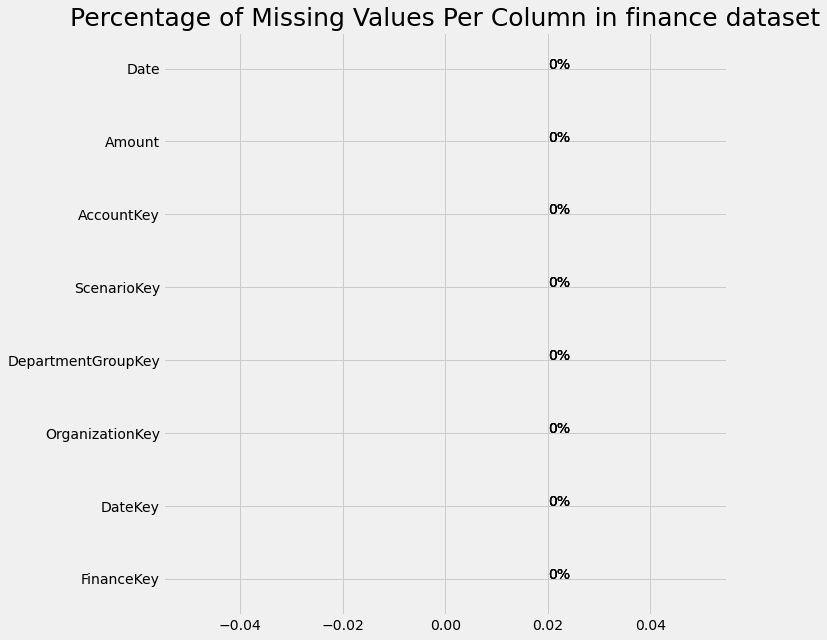

In [41]:
# Plot missing values in finance dataset
ax = finance.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in finance', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/finance.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in finance dataset
ax = finance.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in finance dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/finance.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

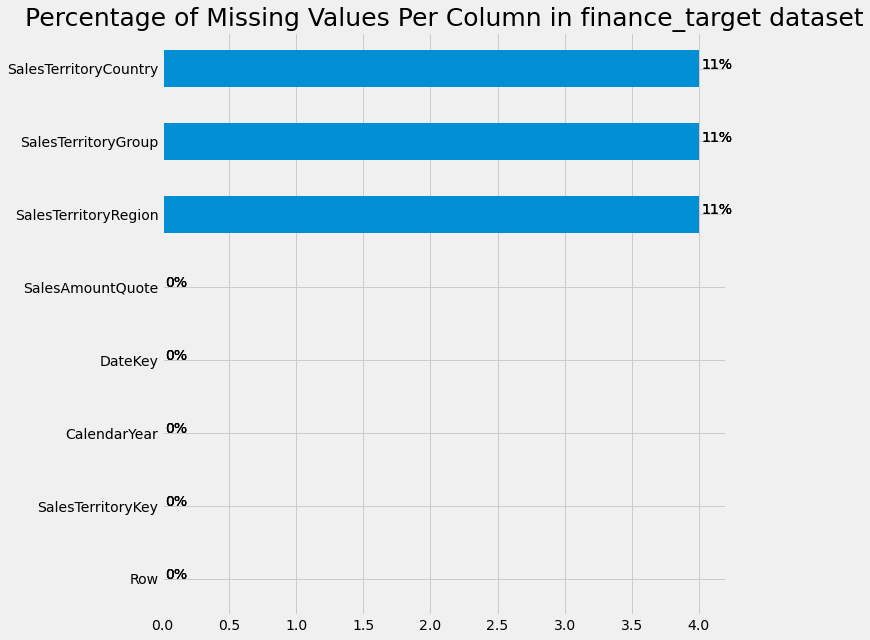

In [42]:
# Plot missing values in finance_target dataset
ax = finance_target.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in finance_target', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/finance_target.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in finance_target dataset
ax = finance_target.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in finance_target dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/finance_target.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

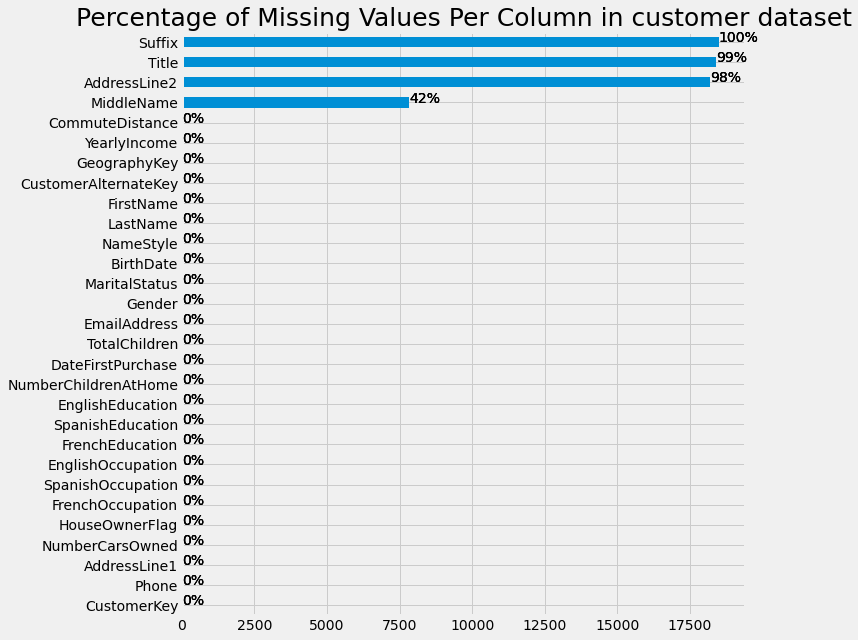

In [43]:
# Plot missing values in customer dataset
ax = customer.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in customer', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/customer.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in Data_1 set
ax = customer.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in customer dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/customer.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

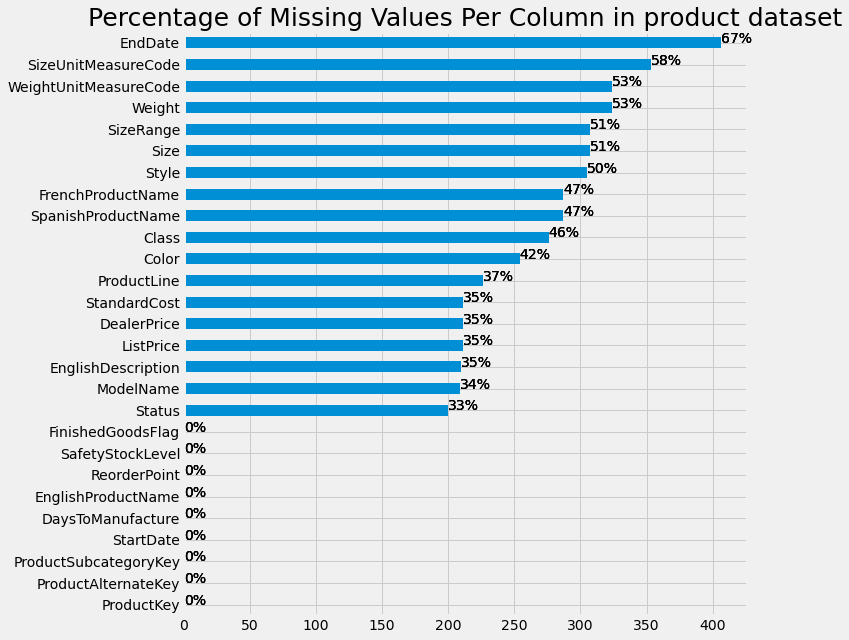

In [44]:
# Plot missing values in product dataset
ax = product.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in product', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/product.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in product dataset
ax = product.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in product dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/product.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

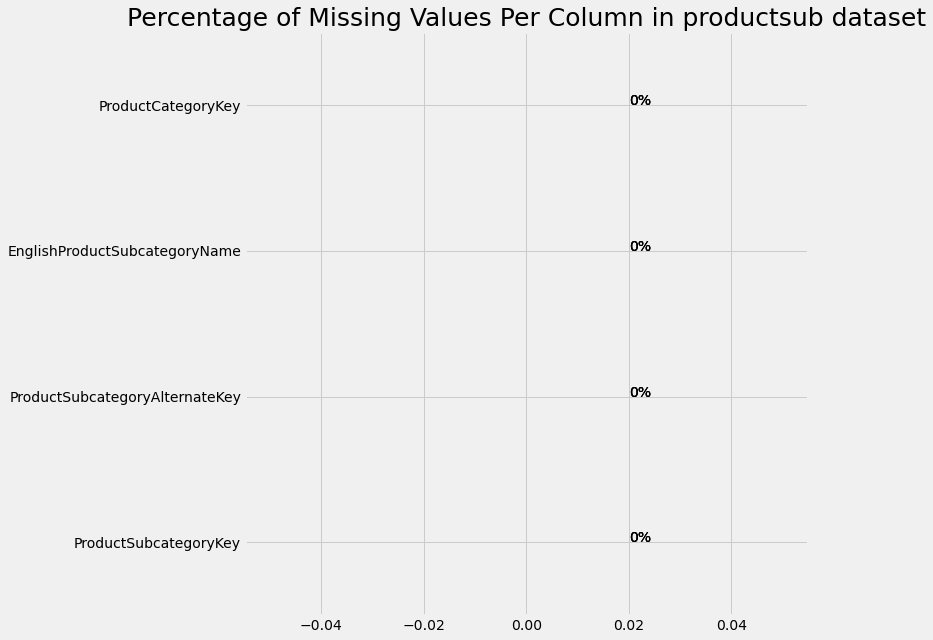

In [45]:
# Plot missing values in productsub dataset
ax = productsub.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in productsub', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/productsub.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in productsub dataset
ax = productsub.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in productsub dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/productsub.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

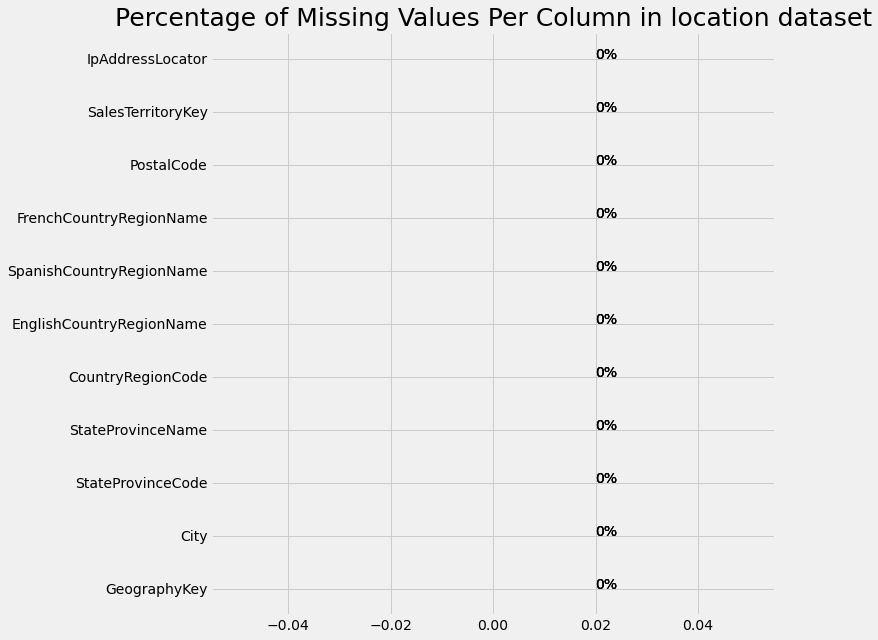

In [46]:
# Plot missing values in location dataset
ax = location.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in location', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/location.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in location set
ax = location.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in location dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/location.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

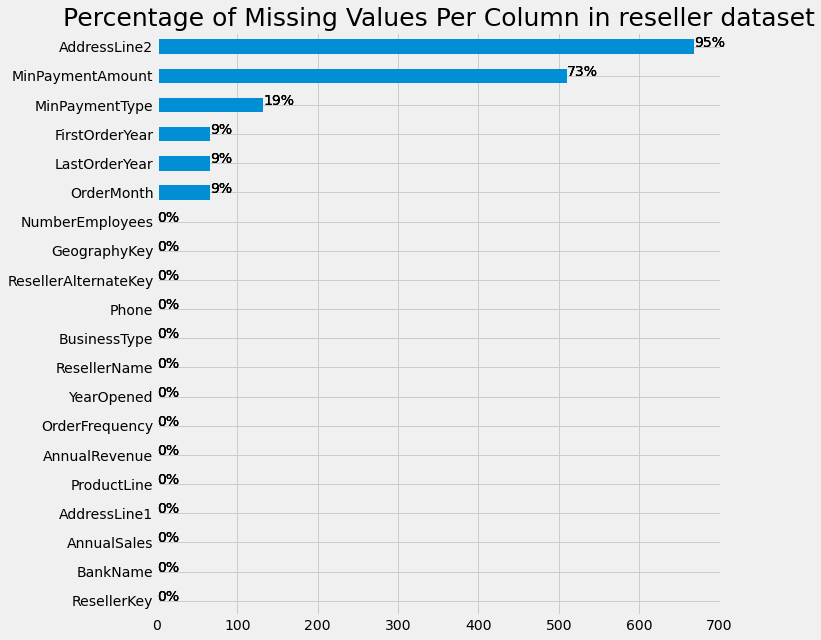

In [47]:
# Plot missing values in reseller dataset
ax = reseller.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in reseller', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/reseller.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
# Plot missing values in loctation data set
ax = reseller.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in reseller dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/reseller.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

**Insights**

Checking missing percentages of all the datasets shows that only four datasets has missing values and they are finance_target, customer, product, reseller and datasets has missing values. And the features with missing values for finance_target dataset are:
- SalesTerritoryRegion
- SalesTerritoryGroup
- SalesTerritoryCountry

These datasets has only **11%** missing values so we can either drop the rows and not the columns or make imputation of **unknown** into missing spaces. The later is better to prevent loss of datasets.

And the features with missing values for customer dataset are:
- Suffix. 
- Title
- AddressLine2
- MiddleName

Which are of high percentage of missing values, even though **Middlename** would have been fixed using imputation since its missing percentage is not up to **60%** as advised by [AnalyticalVidhya](https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/) but it doesn't seem like a very important metrics for our analysis and determining our price prediction hence it will be dropped with others.

And the features with missing values for product dataset are:
- EndDate
- SizeUnitMeasureCode
- e.t.c

In which **EndDate** will be dropped since its percentage is more than **60%** while others won't be dropped since their values are in relation to the products which might be needing certain variables.

And the features with missing values for reseller dataset are:
- AddressLine2
- MinPaymentAmount
- MinPaymentType
- FirstOrderYear
- Last OrderYear
- OrderMonth

Which are of high percentage of missing values, apart from **MinPaymentType**, **FirstOrderYear**,**Last OrderYear**, **OrderMonth** which will be fixed using imputation since its missing percentage is not up to 60% as advised by [AnalyticalVidhya](https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/) and they seem like a very important metrics for determining our price prediction hence won't be dropped along those with extreme missing values.

#### Fixing missing values

In [48]:
#imputing unknown values in finance_target dataset
finance_target['SalesTerritoryCountry'] =finance_target['SalesTerritoryCountry'].fillna('Unknown')
finance_target['SalesTerritoryRegion'] = finance_target['SalesTerritoryRegion'].fillna('Unknown')
finance_target['SalesTerritoryGroup'] = finance_target['SalesTerritoryGroup'].fillna('Unknown')

finance_target.tail(5)

,Row,SalesTerritoryKey,SalesTerritoryRegion,SalesTerritoryGroup,SalesTerritoryCountry,CalendarYear,DateKey,SalesAmountQuote
33,34,10,United Kingdom,Europe,United Kingdom,2006,01/01/2006,3160000
34,35,11,Unknown,Unknown,Unknown,2006,01/01/2006,563000
35,36,11,Unknown,Unknown,Unknown,2007,01/01/2007,1367000
36,37,11,Unknown,Unknown,Unknown,2008,01/01/2008,421000
37,38,11,Unknown,Unknown,Unknown,2005,01/01/2005,35000


In [49]:
# Check for missing values
finance_target.isnull().sum().any()

False

In [50]:
#dropping missing values in customer dataset
customer = customer.drop(columns = 'Suffix')
customer = customer.drop(columns = 'Title')
customer = customer.drop(columns ='AddressLine2')
customer = customer.drop(columns ='MiddleName')

customer.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,NameStyle,BirthDate,MaritalStatus,Gender,EmailAddress,...,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,Jon,Yang,False,1966-04-08,M,M,jon24@adventure-works.com,...,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,1 (11) 500 555-0162,2005-07-22,1-2 Miles
1,11001,37,AW00011001,Eugene,Huang,False,1965-05-14,S,M,eugene10@adventure-works.com,...,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,1 (11) 500 555-0110,2005-07-18,0-1 Miles
2,11002,31,AW00011002,Ruben,Torres,False,1965-08-12,M,M,ruben35@adventure-works.com,...,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,1 (11) 500 555-0184,2005-07-10,2-5 Miles
3,11003,11,AW00011003,Christy,Zhu,False,1968-02-15,S,F,christy12@adventure-works.com,...,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,1 (11) 500 555-0162,2005-07-01,5-10 Miles
4,11004,19,AW00011004,Elizabeth,Johnson,False,1968-08-08,S,F,elizabeth5@adventure-works.com,...,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,1 (11) 500 555-0131,2005-07-26,1-2 Miles


In [51]:
customer.nunique()

CustomerKey             18484
GeographyKey              336
CustomerAlternateKey    18484
FirstName                 670
LastName                  375
NameStyle                   1
BirthDate                8252
MaritalStatus               2
Gender                      2
EmailAddress            18484
YearlyIncome               16
TotalChildren               6
NumberChildrenAtHome        6
EnglishEducation            5
SpanishEducation            5
FrenchEducation             5
EnglishOccupation           5
SpanishOccupation           5
FrenchOccupation            5
HouseOwnerFlag              2
NumberCarsOwned             5
AddressLine1            12802
Phone                    8890
DateFirstPurchase        1124
CommuteDistance             5
dtype: int64

In [52]:
# Check for missing values
customer.isnull().sum().any()

False

In [53]:
#dropping missing values in product dataset
product = product.drop(columns = 'EndDate')
product = product.drop(columns = 'SizeUnitMeasureCode')
product = product.drop(columns = 'WeightUnitMeasureCode')
product = product.drop(columns = 'SpanishProductName')
product = product.drop(columns = 'FrenchProductName')
product = product.drop(columns = 'Weight')
product = product.drop(columns = 'Class')
product = product.drop(columns = 'Size')
product = product.drop(columns = 'Style')
product = product.drop(columns = 'SizeRange')
product = product.drop(columns = 'EnglishDescription')

product.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,ModelName,StartDate,Status
0,1,AR-5381,0,Adjustable Race,NaN,False,NaN,1000,750,NaN,0,NaN,NaN,NaN,01/06/1998 00:00,Current
1,2,BA-8327,0,Bearing Ball,NaN,False,NaN,1000,750,NaN,0,NaN,NaN,NaN,01/06/1998 00:00,Current
2,3,BE-2349,0,BB Ball Bearing,NaN,False,NaN,800,600,NaN,1,NaN,NaN,NaN,01/06/1998 00:00,Current
3,4,BE-2908,0,Headset Ball Bearings,NaN,False,NaN,800,600,NaN,0,NaN,NaN,NaN,01/06/1998 00:00,Current
4,5,BL-2036,0,Blade,NaN,False,NaN,800,600,NaN,1,NaN,NaN,NaN,01/06/1998 00:00,Current


In [54]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             606 non-null    int64  
 1   ProductAlternateKey    606 non-null    object 
 2   ProductSubcategoryKey  606 non-null    int64  
 3   EnglishProductName     606 non-null    object 
 4   StandardCost           395 non-null    float64
 5   FinishedGoodsFlag      606 non-null    bool   
 6   Color                  352 non-null    object 
 7   SafetyStockLevel       606 non-null    int64  
 8   ReorderPoint           606 non-null    int64  
 9   ListPrice              395 non-null    float64
 10  DaysToManufacture      606 non-null    int64  
 11  ProductLine            380 non-null    object 
 12  DealerPrice            395 non-null    float64
 13  ModelName              397 non-null    object 
 14  StartDate              606 non-null    object 
 15  Status

In [55]:
product.nunique()

ProductKey               606
ProductAlternateKey      504
ProductSubcategoryKey     38
EnglishProductName       504
StandardCost             134
FinishedGoodsFlag          2
Color                      9
SafetyStockLevel           6
ReorderPoint               6
ListPrice                120
DaysToManufacture          4
ProductLine                4
DealerPrice              120
ModelName                119
StartDate                  4
Status                     1
dtype: int64

In [56]:
#imputing neccessary values in the product dataset
product['Status'] =product['Status'].fillna('Not_Current')
product['ModelName'] = product['ModelName'].fillna('Not_Available')
product['ColorProductLine'] = product['Color'].fillna(product['Color'].mode()[0])
product['ProductLine'] = product['ProductLine'].fillna(product['ProductLine'].mode()[0])
product['StandardCost'] = product['StandardCost'].fillna(product['StandardCost'].mean())
product['DealerPrice'] = product['DealerPrice'].fillna(product['DealerPrice'].mean())
product['ListPrice'] = product['ListPrice'].fillna(product['ListPrice'].mean())

product.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,ModelName,StartDate,Status,ColorProductLine
0,1,AR-5381,0,Adjustable Race,434.265829,False,NaN,1000,750,747.661762,0,R,448.59706,Not_Available,01/06/1998 00:00,Current,Black
1,2,BA-8327,0,Bearing Ball,434.265829,False,NaN,1000,750,747.661762,0,R,448.59706,Not_Available,01/06/1998 00:00,Current,Black
2,3,BE-2349,0,BB Ball Bearing,434.265829,False,NaN,800,600,747.661762,1,R,448.59706,Not_Available,01/06/1998 00:00,Current,Black
3,4,BE-2908,0,Headset Ball Bearings,434.265829,False,NaN,800,600,747.661762,0,R,448.59706,Not_Available,01/06/1998 00:00,Current,Black
4,5,BL-2036,0,Blade,434.265829,False,NaN,800,600,747.661762,1,R,448.59706,Not_Available,01/06/1998 00:00,Current,Black


In [57]:
# Check for missing values
product.isnull().sum().any()

True

In [58]:
#dropping missing values in reseller dataset
reseller = reseller.drop(columns = 'AddressLine2')
reseller = reseller.drop(columns = 'MinPaymentAmount')

reseller.head()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AnnualSales,BankName,MinPaymentType,AnnualRevenue,YearOpened
0,1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5.0,2005.0,2006.0,Road,2251 Elliot Avenue,300000,International Bank,NaN,30000,1974
1,2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5.0,2006.0,2008.0,Mountain,3207 S Grady Way,800000,International Security,1.0,80000,1976
2,3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6.0,2005.0,2008.0,Road,12345 Sterling Avenue,1500000,Primary International,2.0,150000,1978
3,4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4.0,2006.0,2008.0,Road,800 Interchange Blvd.,300000,United Security,3.0,30000,1980
4,5,322,AW00000005,828-555-0186,Specialty Bike Shop,Metropolitan Sports Supply,13,A,6.0,2006.0,2008.0,Road,482505 Warm Springs Blvd.,800000,Primary Bank & Reserve,NaN,80000,1982


In [59]:
reseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ResellerKey           701 non-null    int64  
 1   GeographyKey          701 non-null    int64  
 2   ResellerAlternateKey  701 non-null    object 
 3   Phone                 701 non-null    object 
 4   BusinessType          701 non-null    object 
 5   ResellerName          701 non-null    object 
 6   NumberEmployees       701 non-null    int64  
 7   OrderFrequency        701 non-null    object 
 8   OrderMonth            635 non-null    float64
 9   FirstOrderYear        635 non-null    float64
 10  LastOrderYear         635 non-null    float64
 11  ProductLine           701 non-null    object 
 12  AddressLine1          701 non-null    object 
 13  AnnualSales           701 non-null    int64  
 14  BankName              701 non-null    object 
 15  MinPaymentType        5

In [60]:
#imputing neccessary values in the product dataset
reseller['MinPaymentType'] = reseller['MinPaymentType'].fillna(reseller['MinPaymentType'].median())
reseller['OrderMonth'] = reseller['OrderMonth'].fillna(reseller['OrderMonth'].mean())
reseller['FirstOrderYear'] = reseller['FirstOrderYear'].fillna(reseller['FirstOrderYear'].mean())
reseller['LastOrderYear'] = reseller['LastOrderYear'].fillna(reseller['LastOrderYear'].mean())

In [61]:
#imputing neccessary values in the reseller dataset
fill_missing(reseller ) #For forward fill
fill_missing(reseller , 'backfill') #For backward fill

ResellerKey             0
GeographyKey            0
ResellerAlternateKey    0
Phone                   0
BusinessType            0
ResellerName            0
NumberEmployees         0
OrderFrequency          0
OrderMonth              0
FirstOrderYear          0
LastOrderYear           0
ProductLine             0
AddressLine1            0
AnnualSales             0
BankName                0
MinPaymentType          0
AnnualRevenue           0
YearOpened              0
dtype: int64

In [62]:
reseller.head()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AnnualSales,BankName,MinPaymentType,AnnualRevenue,YearOpened
0,1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5.0,2005.0,2006.0,Road,2251 Elliot Avenue,300000,International Bank,2.0,30000,1974
1,2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5.0,2006.0,2008.0,Mountain,3207 S Grady Way,800000,International Security,1.0,80000,1976
2,3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6.0,2005.0,2008.0,Road,12345 Sterling Avenue,1500000,Primary International,2.0,150000,1978
3,4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4.0,2006.0,2008.0,Road,800 Interchange Blvd.,300000,United Security,3.0,30000,1980
4,5,322,AW00000005,828-555-0186,Specialty Bike Shop,Metropolitan Sports Supply,13,A,6.0,2006.0,2008.0,Road,482505 Warm Springs Blvd.,800000,Primary Bank & Reserve,2.0,80000,1982


In [63]:
# Check for missing values
reseller.isnull().sum().any()

False

**Insights**
- To fill for missing values, I used modal fill for categorical columns and mean or median for numerical columns. 

- But for certain columns with empty rows and are having several differences in information but yet useful i assume that the data in the empty row is different from other available datas I thereby input Not Available or Unknown e.g in SalesTerritory Region under finance_target.

The modal filling idea was been tagged a smart move as stated thus "In some situations replacing mode for categorical variables is additionally a smart idea." by [AnalyticalVidhya](https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/)

In [64]:
#Check Unique values for the common feature
print(customer['GeographyKey'].nunique())
print(location['GeographyKey'].nunique())

336
655


In [65]:
print(reseller['GeographyKey'].nunique())
print(location['GeographyKey'].nunique())

510
655


In [66]:
#Check Unique values for the common feature
print(customer['GeographyKey'].nunique())
print(reseller['GeographyKey'].nunique())

336
510


In [67]:
#Check Unique values for the common feature
print(location['SalesTerritoryKey'].nunique())
print(finance_target['SalesTerritoryKey'].nunique())

10
11


In [68]:
#Check Unique values for the common feature
print(product['ProductSubcategoryKey'].nunique())
print(productsub['ProductSubcategoryKey'].nunique())

38
37


- This gives an inference that they are having almost the same classes of data in their common feature, which gives avenue to join on that feature.

#### Merging Datasets
From some of the questions to be answered in this project, there is a need to compare some features which are located in different datasets, this calls for merging datasets together to achieve easier analysis on the data.
- We will be merging our datasets with the most valuable metrics to consider in the prediction. 

**Which are**
- **Reseller and location datasets**: A Particular Feature **Geography key** seems to be present in the **reseller** and **location datasets**, this creates a better avenue for merging the datasets together since they have unique numbers. Resulting missing values will be filled to avoid loss of data or drop if its not relevant for our analysis. 
- **Merge (reseller and location datasets) and customer**: A Particular Feature **Geography key** seems to be present in the **Merge (reseller and location datasets)** and **customer datasets**, this creates a better avenue for merging the datasets together. Resulting missing values will be filled to avoid loss of data or drop if its not relevant for our analysis.
- **Product and Product_sub**: A Particular Feature **ProductSubcategoryKey** seems to be present in the **product** and **product_sub datasets**, this creates a better avenue for merging the datasets together. Resulting missing values will be filled to avoid loss of data or drop if its not relevant for our analysis and prediction.

In [69]:
#customer_reseller merging
resell_loc = pd.merge(reseller, location, on='GeographyKey',how='left')
resell_loc.head()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,...,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5.0,2005.0,...,Seattle,WA,Washington,US,United States,Estados Unidos,États-Unis,98104,1,203.0.113.130
1,2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5.0,2006.0,...,Renton,WA,Washington,US,United States,Estados Unidos,États-Unis,98055,1,203.0.113.128
2,3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6.0,2005.0,...,Irving,TX,Texas,US,United States,Estados Unidos,États-Unis,75061,4,203.0.113.77
3,4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4.0,2006.0,...,Austin,TX,Texas,US,United States,Estados Unidos,États-Unis,78701,4,203.0.113.65
4,5,322,AW00000005,828-555-0186,Specialty Bike Shop,Metropolitan Sports Supply,13,A,6.0,2006.0,...,Fremont,CA,California,US,United States,Estados Unidos,États-Unis,94536,4,192.0.2.69


In [70]:
resell_loc.tail()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,...,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
696,697,601,AW00000697,774-555-0133,Value Added Reseller,Brakes and Gears,12,S,5.0,2005.0,...,Tooele,UT,Utah,US,United States,Estados Unidos,États-Unis,84074,1,203.0.113.94
697,698,595,AW00000698,944-555-0148,Specialty Bike Shop,Western Bike Supplies,48,A,4.0,2006.0,...,Cedar City,UT,Utah,US,United States,Estados Unidos,États-Unis,84720,1,203.0.113.88
698,699,496,AW00000699,716-555-0123,Warehouse,Sensational Discount Store,80,Q,3.0,2008.0,...,Kannapolis,NC,North Carolina,US,United States,Estados Unidos,États-Unis,28081,5,192.0.2.243
699,700,494,AW00000700,703-555-0158,Value Added Reseller,Underglaze and Finish Company,11,S,5.0,2007.0,...,Charlotte,NC,North Carolina,US,United States,Estados Unidos,États-Unis,28202,5,192.0.2.241
700,701,41,AW00000701,674-555-0188,Warehouse,Future Bikes,81,Q,6.0,2006.0,...,Calgary,AB,Alberta,CA,Canada,Canada,Canada,T2P 2G8,6,198.51.100.42


In [71]:
resell_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 700
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ResellerKey               701 non-null    int64  
 1   GeographyKey              701 non-null    int64  
 2   ResellerAlternateKey      701 non-null    object 
 3   Phone                     701 non-null    object 
 4   BusinessType              701 non-null    object 
 5   ResellerName              701 non-null    object 
 6   NumberEmployees           701 non-null    int64  
 7   OrderFrequency            701 non-null    object 
 8   OrderMonth                701 non-null    float64
 9   FirstOrderYear            701 non-null    float64
 10  LastOrderYear             701 non-null    float64
 11  ProductLine               701 non-null    object 
 12  AddressLine1              701 non-null    object 
 13  AnnualSales               701 non-null    int64  
 14  BankName  

In [72]:
#Checking for unique values
resell_loc.nunique()

ResellerKey                 701
GeographyKey                510
ResellerAlternateKey        701
Phone                       610
BusinessType                  3
ResellerName                699
NumberEmployees              76
OrderFrequency                3
OrderMonth                   13
FirstOrderYear                5
LastOrderYear                 5
ProductLine                   3
AddressLine1                687
AnnualSales                   5
BankName                      7
MinPaymentType                3
AnnualRevenue                 5
YearOpened                   32
City                        451
StateProvinceCode            65
StateProvinceName            65
CountryRegionCode             6
EnglishCountryRegionName      6
SpanishCountryRegionName      6
FrenchCountryRegionName       6
PostalCode                  501
SalesTerritoryKey            10
IpAddressLocator            510
dtype: int64

In [73]:
# Check for missing values
resell_loc.isnull().sum().any()

False

In [74]:
resell_loc.shape

(701, 28)

In [75]:
# Check for duplicates
resell_loc.duplicated().any()

False

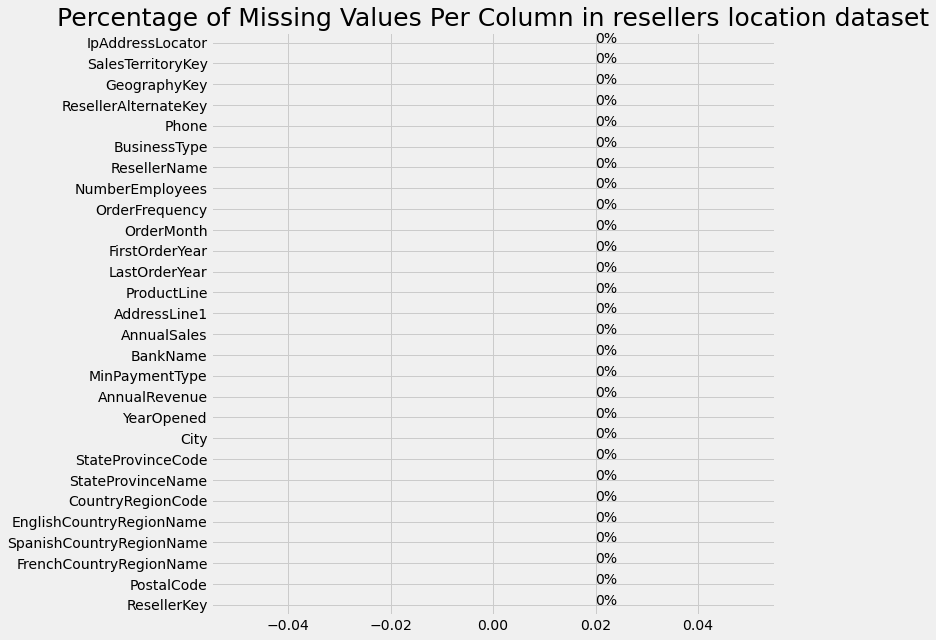

In [76]:
# Plot missing values in data set to confirm the dropped datas
ax = resell_loc.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in resellers location dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/resell_loc.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Since there are no missing values I will not proceed with the filling of missing datasets

In [77]:
#Check Unique values for the common feature
print(customer['GeographyKey'].nunique())
print(resell_loc['GeographyKey'].nunique())

336
510


In [78]:
#customer_reseller merging
cust_resell_loc = pd.merge(customer, resell_loc, on='GeographyKey',how='right')
cust_resell_loc.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,FirstName,LastName,NameStyle,BirthDate,MaritalStatus,Gender,EmailAddress,...,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,11192.0,637,AW00011192,James,Brown,False,1945-09-13,M,M,james79@adventure-works.com,...,Seattle,WA,Washington,US,United States,Estados Unidos,États-Unis,98104,1,203.0.113.130
1,11197.0,637,AW00011197,Andrea,Morris,False,1946-06-18,M,F,andrea18@adventure-works.com,...,Seattle,WA,Washington,US,United States,Estados Unidos,États-Unis,98104,1,203.0.113.130
2,11325.0,637,AW00011325,Elijah,Ross,False,1939-07-02,S,M,elijah7@adventure-works.com,...,Seattle,WA,Washington,US,United States,Estados Unidos,États-Unis,98104,1,203.0.113.130
3,11630.0,637,AW00011630,Haley,Powell,False,1971-12-25,M,F,haley27@adventure-works.com,...,Seattle,WA,Washington,US,United States,Estados Unidos,États-Unis,98104,1,203.0.113.130
4,11829.0,637,AW00011829,Sophia,Campbell,False,1969-11-02,M,F,sophia5@adventure-works.com,...,Seattle,WA,Washington,US,United States,Estados Unidos,États-Unis,98104,1,203.0.113.130


In [79]:
# Check for missing values
cust_resell_loc.isnull().sum().any()

True

In [80]:
cust_resell_loc.shape

(12595, 52)

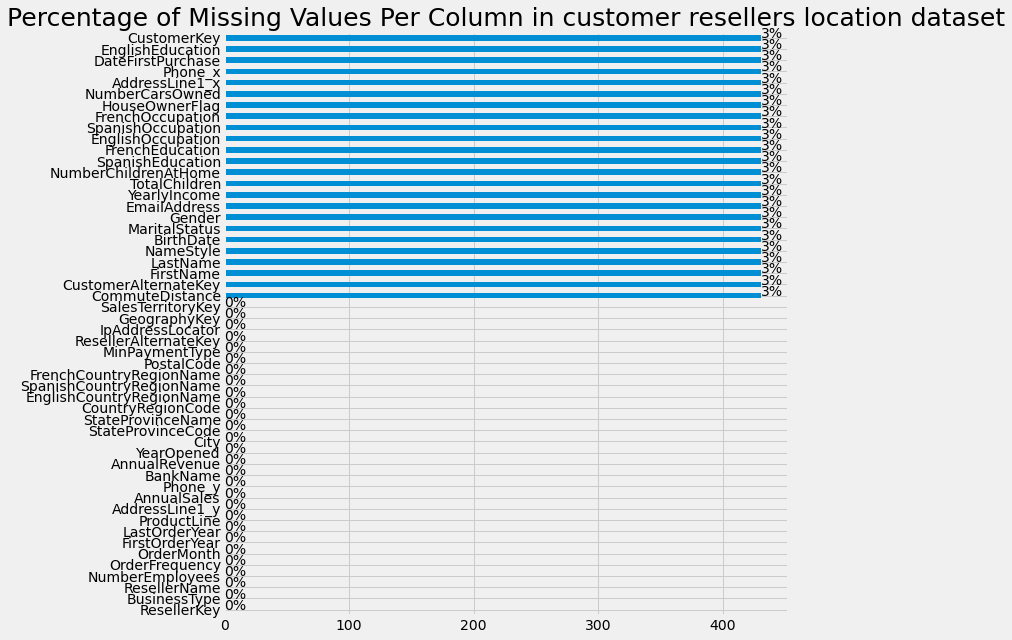

In [81]:
# Plot missing values in data set to confirm the dropped datas
ax = cust_resell_loc.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in customer resellers location dataset', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/cust_resell_loc.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [82]:
#Filling Missing Values using forward and backward fill method since its a small values that are missing in our dataset
fill_missing(cust_resell_loc)#forward filling
fill_missing(cust_resell_loc, 'backfill') #backwardfilling

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
FirstName                   0
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1_x              0
Phone_x                     0
DateFirstPurchase           0
CommuteDistance             0
ResellerKey                 0
ResellerAlternateKey        0
Phone_y                     0
BusinessType                0
ResellerName                0
NumberEmployees             0
OrderFrequency              0
OrderMonth                  0
FirstOrder

In [83]:
#Checking for unique values
cust_resell_loc.nunique()

CustomerKey                 7704
GeographyKey                 510
CustomerAlternateKey        7704
FirstName                    618
LastName                     309
NameStyle                      1
BirthDate                   5290
MaritalStatus                  2
Gender                         2
EmailAddress                7704
YearlyIncome                  16
TotalChildren                  6
NumberChildrenAtHome           6
EnglishEducation               5
SpanishEducation               5
FrenchEducation                5
EnglishOccupation              5
SpanishOccupation              5
FrenchOccupation               5
HouseOwnerFlag                 2
NumberCarsOwned                5
AddressLine1_x              6609
Phone_x                     2929
DateFirstPurchase           1079
CommuteDistance                5
ResellerKey                  701
ResellerAlternateKey         701
Phone_y                      610
BusinessType                   3
ResellerName                 699
NumberEmpl

In [84]:
#product_category merging
product_cat = pd.merge(product, productsub, on='ProductSubcategoryKey',how='right')
product_cat.head(20)

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,ModelName,StartDate,Status,ColorProductLine,ProductSubcategoryAlternateKey,EnglishProductSubcategoryName,ProductCategoryKey
0,344,BK-M82S-38,1,"Mountain-100 Silver, 38",1912.1544,True,Silver,100,75,3399.9900,4,M,2039.9940,Mountain-100,01/07/2005 00:00,Not_Current,Silver,1,Mountain Bikes,1
1,345,BK-M82S-42,1,"Mountain-100 Silver, 42",1912.1544,True,Silver,100,75,3399.9900,4,M,2039.9940,Mountain-100,01/07/2005 00:00,Not_Current,Silver,1,Mountain Bikes,1
2,346,BK-M82S-44,1,"Mountain-100 Silver, 44",1912.1544,True,Silver,100,75,3399.9900,4,M,2039.9940,Mountain-100,01/07/2005 00:00,Not_Current,Silver,1,Mountain Bikes,1
3,347,BK-M82S-48,1,"Mountain-100 Silver, 48",1912.1544,True,Silver,100,75,3399.9900,4,M,2039.9940,Mountain-100,01/07/2005 00:00,Not_Current,Silver,1,Mountain Bikes,1
4,348,BK-M82B-38,1,"Mountain-100 Black, 38",1898.0944,True,Black,100,75,3374.9900,4,M,2024.9940,Mountain-100,01/07/2005 00:00,Not_Current,Black,1,Mountain Bikes,1
5,349,BK-M82B-42,1,"Mountain-100 Black, 42",1898.0944,True,Black,100,75,3374.9900,4,M,2024.9940,Mountain-100,01/07/2005 00:00,Not_Current,Black,1,Mountain Bikes,1
6,350,BK-M82B-44,1,"Mountain-100 Black, 44",1898.0944,True,Black,100,75,3374.9900,4,M,2024.9940,Mountain-100,01/07/2005 00:00,Not_Current,Black,1,Mountain Bikes,1
7,351,BK-M82B-48,1,"Mountain-100 Black, 48",1898.0944,True,Black,100,75,3374.9900,4,M,2024.9940,Mountain-100,01/07/2005 00:00,Not_Current,Black,1,Mountain Bikes,1
8,352,BK-M68S-38,1,"Mountain-200 Silver, 38",1117.8559,True,Silver,100,75,2071.4196,4,M,1242.8518,Mountain-200,01/07/2006 00:00,Not_Current,Silver,1,Mountain Bikes,1
9,353,BK-M68S-38,1,"Mountain-200 Silver, 38",1265.6195,True,Silver,100,75,2319.9900,4,M,1391.9940,Mountain-200,01/07/2007 00:00,Current,Silver,1,Mountain Bikes,1


In [85]:
#### Product 
product_cat.tail()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,ModelName,StartDate,Status,ColorProductLine,ProductSubcategoryAlternateKey,EnglishProductSubcategoryName,ProductCategoryKey
392,537,TI-M823,37,HL Mountain Tire,13.0900,True,NaN,500,375,35.00,0,M,21.000,HL Mountain Tire,01/07/2007 00:00,Current,Black,37,Tires and Tubes,4
393,538,TI-R092,37,LL Road Tire,8.0373,True,NaN,500,375,21.49,0,R,12.894,LL Road Tire,01/07/2007 00:00,Current,Black,37,Tires and Tubes,4
394,539,TI-R628,37,ML Road Tire,9.3463,True,NaN,500,375,24.99,0,R,14.994,ML Road Tire,01/07/2007 00:00,Current,Black,37,Tires and Tubes,4
395,540,TI-R982,37,HL Road Tire,12.1924,True,NaN,500,375,32.60,0,R,19.560,HL Road Tire,01/07/2007 00:00,Current,Black,37,Tires and Tubes,4
396,541,TI-T723,37,Touring Tire,10.8423,True,NaN,500,375,28.99,0,T,17.394,Touring Tire,01/07/2007 00:00,Current,Black,37,Tires and Tubes,4


In [86]:
product_cat.shape

(397, 20)

In [87]:
# Check for missing values
product_cat.isnull().sum().any()

True

In [88]:
# Check for duplicates
product_cat.duplicated().any()

False

In [89]:
product_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ProductKey                      397 non-null    int64  
 1   ProductAlternateKey             397 non-null    object 
 2   ProductSubcategoryKey           397 non-null    int64  
 3   EnglishProductName              397 non-null    object 
 4   StandardCost                    397 non-null    float64
 5   FinishedGoodsFlag               397 non-null    bool   
 6   Color                           341 non-null    object 
 7   SafetyStockLevel                397 non-null    int64  
 8   ReorderPoint                    397 non-null    int64  
 9   ListPrice                       397 non-null    float64
 10  DaysToManufacture               397 non-null    int64  
 11  ProductLine                     397 non-null    object 
 12  DealerPrice                     397 

In [90]:
#Checking for unique values
product_cat.nunique()

ProductKey                        397
ProductAlternateKey               295
ProductSubcategoryKey              37
EnglishProductName                295
StandardCost                      135
FinishedGoodsFlag                   1
Color                               9
SafetyStockLevel                    3
ReorderPoint                        3
ListPrice                         121
DaysToManufacture                   4
ProductLine                         4
DealerPrice                       121
ModelName                         119
StartDate                           4
Status                              2
ColorProductLine                    9
ProductSubcategoryAlternateKey     37
EnglishProductSubcategoryName      37
ProductCategoryKey                  4
dtype: int64

<a name="EDA"></a>
## 6. EXPLORATIVE DATA ANALYSIS

    

#### Our EDA will be split into three
- Analysis_1 = cust_resell_loc
- Analysis_2 = finance
- Analysis_3 = finance_target
- Analysis_eda = product_cat

In [91]:
#copying the dataframe for ease of with analysis
Analysis_1 = cust_resell_loc.copy()

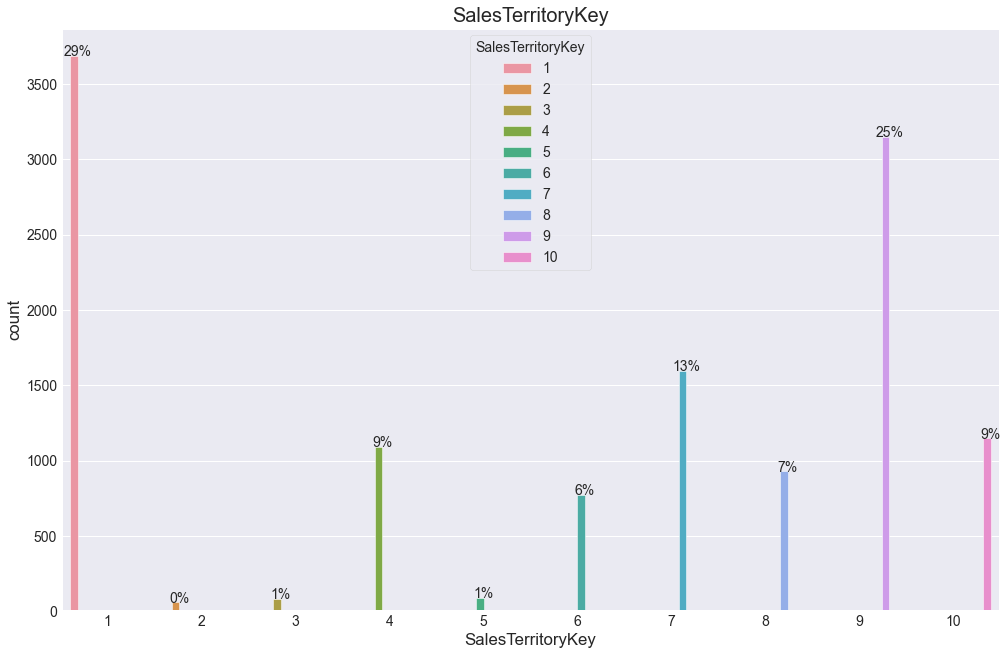

In [92]:
# SalesTerritoryKey

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x="SalesTerritoryKey", hue = "SalesTerritoryKey", data=Analysis_1)
plt.title('SalesTerritoryKey', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [93]:
Get_summary_stats_category(Analysis_1, ['SalesTerritoryKey'])

modal value for SalesTerritoryKey is 1
Unique values for SalesTerritoryKey is [ 1  4  5  6  7  8  9 10  3  2]
The number of unique values for SalesTerritoryKey is 10
 The frequency for 1 is : 3687
The percentage of the modal score in the distribution is 29.273521238586742


1     3687
9     3149
7     1594
10    1147
4     1092
8      928
6      770
5       87
3       83
2       58
Name: SalesTerritoryKey, dtype: int64

#### Sales Territory Region in respect to their keys

1. Northwest America
2. Northeast America
3. Central America
4. Southwest America
5. Southeast America
6. Canada
7. France
8. Germany
9. Australia
10. United Kingdom

- Though we have 11 Sales Territory Region. Only 10 are used in this dataset
- With **Northwest America** having the highest Count between our Customer and Retailer relationship.

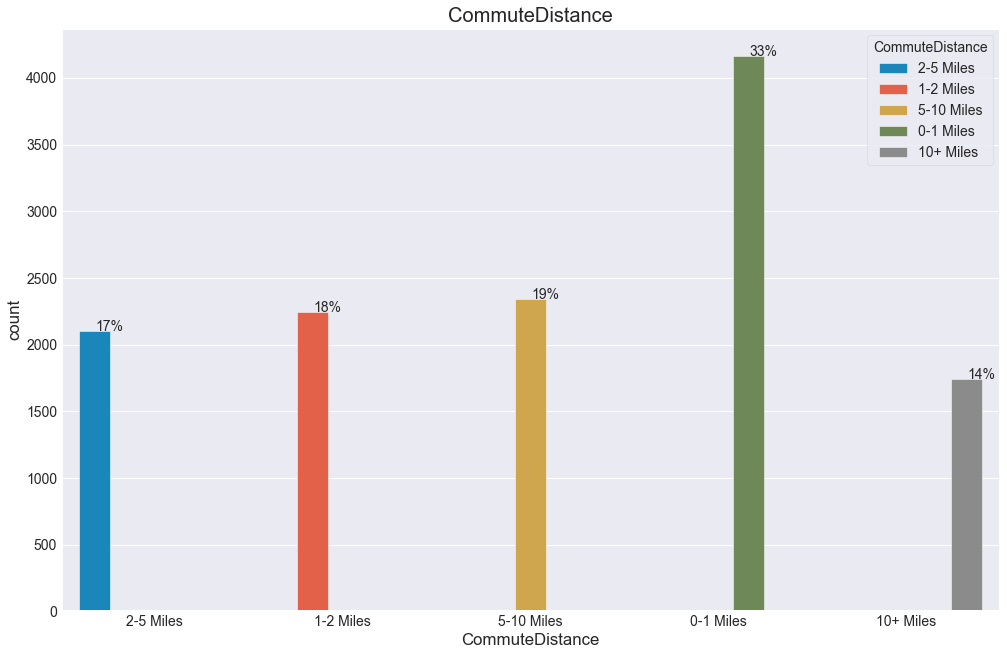

In [94]:
# CommuteDistance

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x="CommuteDistance", hue = "CommuteDistance", data=Analysis_1)
plt.title('CommuteDistance', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [95]:
Get_summary_stats_category(Analysis_1, ['CommuteDistance'])

modal value for CommuteDistance is 0-1 Miles
Unique values for CommuteDistance is ['2-5 Miles' '1-2 Miles' '5-10 Miles' '0-1 Miles' '10+ Miles']
The number of unique values for CommuteDistance is 5
 The frequency for 0-1 Miles is : 4165
The percentage of the modal score in the distribution is 33.068678046843985


0-1 Miles     4165
5-10 Miles    2343
1-2 Miles     2242
2-5 Miles     2103
10+ Miles     1742
Name: CommuteDistance, dtype: int64

- Most customers purchase most of thier goods within 0-1miles commute Distance.
- While 14% onliy go 10+ miles to purchase their needed goods. 

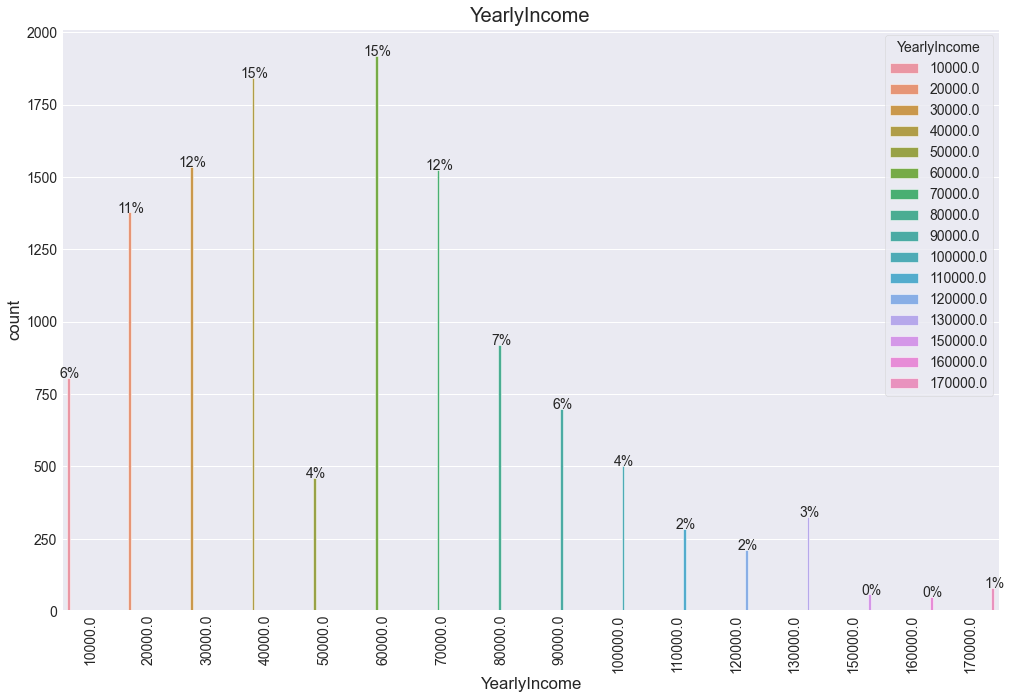

In [96]:
# YearlyIncome

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x="YearlyIncome", hue = "YearlyIncome", data=Analysis_1)
plt.tick_params(axis='x', rotation=90)
plt.title('YearlyIncome', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [97]:
Get_summary_stats_category(Analysis_1, ['YearlyIncome'])

modal value for YearlyIncome is 60000.0
Unique values for YearlyIncome is [ 60000.  70000.  90000. 100000.  40000.  80000.  30000.  50000. 110000.
  20000. 130000.  10000. 120000. 150000. 170000. 160000.]
The number of unique values for YearlyIncome is 16
 The frequency for 60000.0 is : 1919
The percentage of the modal score in the distribution is 15.236204843191741


60000.0     1919
40000.0     1842
30000.0     1534
70000.0     1524
20000.0     1378
80000.0      921
10000.0      806
90000.0      698
100000.0     503
50000.0      461
Name: YearlyIncome, dtype: int64

- This shows that most of the customers earn an average of 60000 or 40000 yearly. 

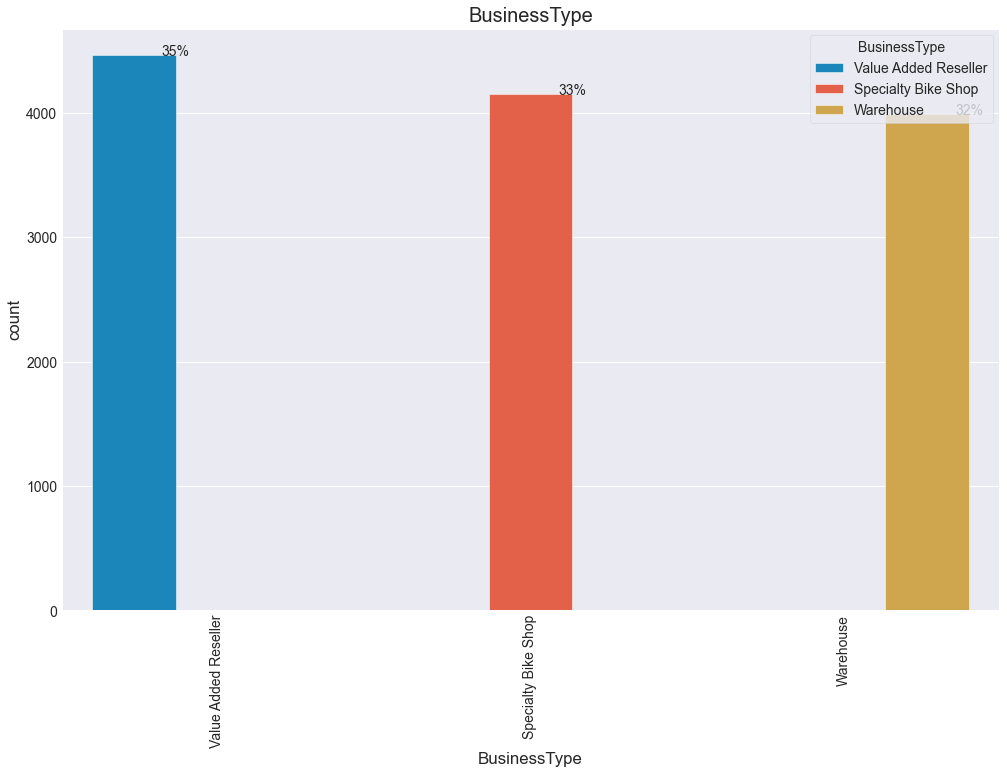

In [98]:
# Resellers Bussiness type

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x='BusinessType',hue = "BusinessType",data=Analysis_1)
plt.tick_params(axis='x', rotation=90)
plt.title('BusinessType', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [99]:
Get_summary_stats_category(Analysis_1, ['BusinessType'])

modal value for BusinessType is Value Added Reseller
Unique values for BusinessType is ['Value Added Reseller' 'Specialty Bike Shop' 'Warehouse']
The number of unique values for BusinessType is 3
 The frequency for Value Added Reseller is : 4459
The percentage of the modal score in the distribution is 35.40293767368003


Value Added Reseller    4459
Specialty Bike Shop     4147
Warehouse               3989
Name: BusinessType, dtype: int64

- Value Added Resellers are the Business Type with highest number

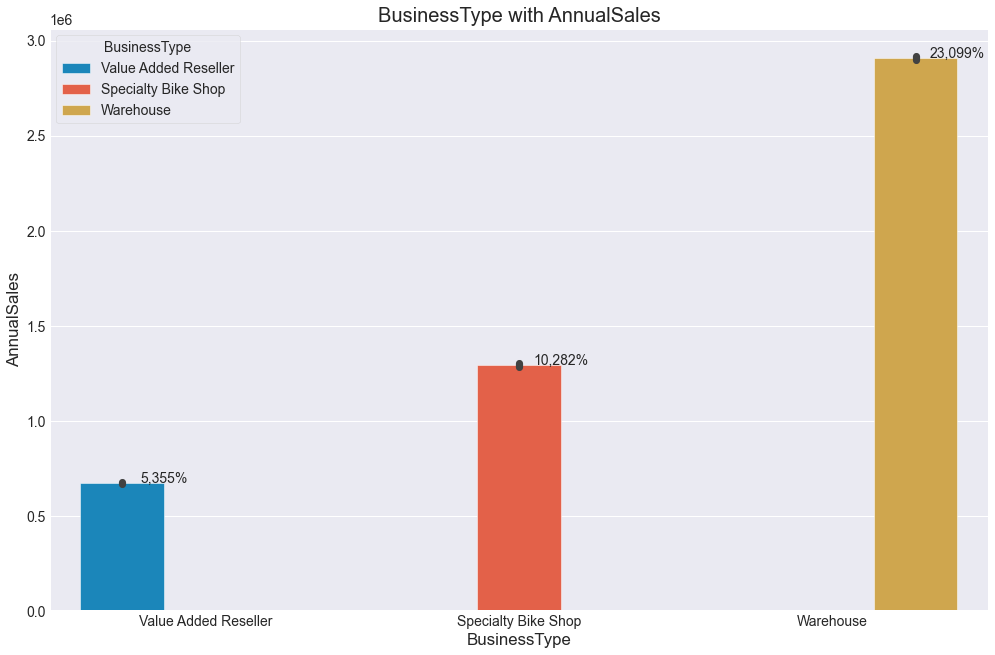

In [100]:
# BusinessType with AnnualSales

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.barplot(data=Analysis_1, x='BusinessType',y='AnnualSales',hue = "BusinessType")
plt.title('BusinessType with AnnualSales', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

- Warehouse Business Type has more Annual Sales than other types of Businesses

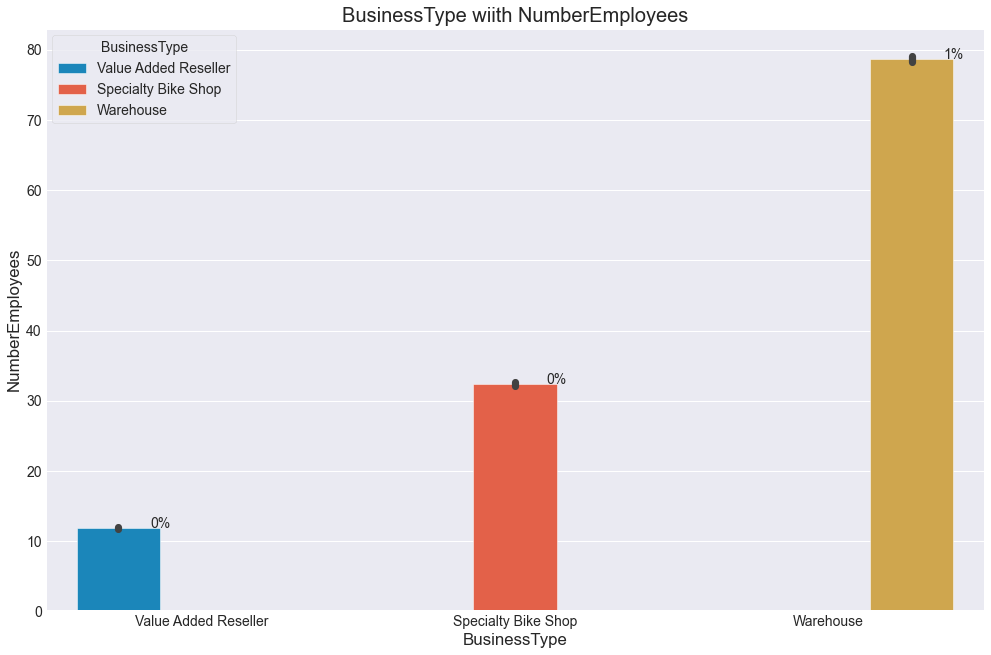

In [101]:
# Number of Employees

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.barplot(data=Analysis_1, x='BusinessType',y='NumberEmployees',hue = "BusinessType")
plt.title('BusinessType wiith NumberEmployees', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

- Warehouses has the highest number of Employees

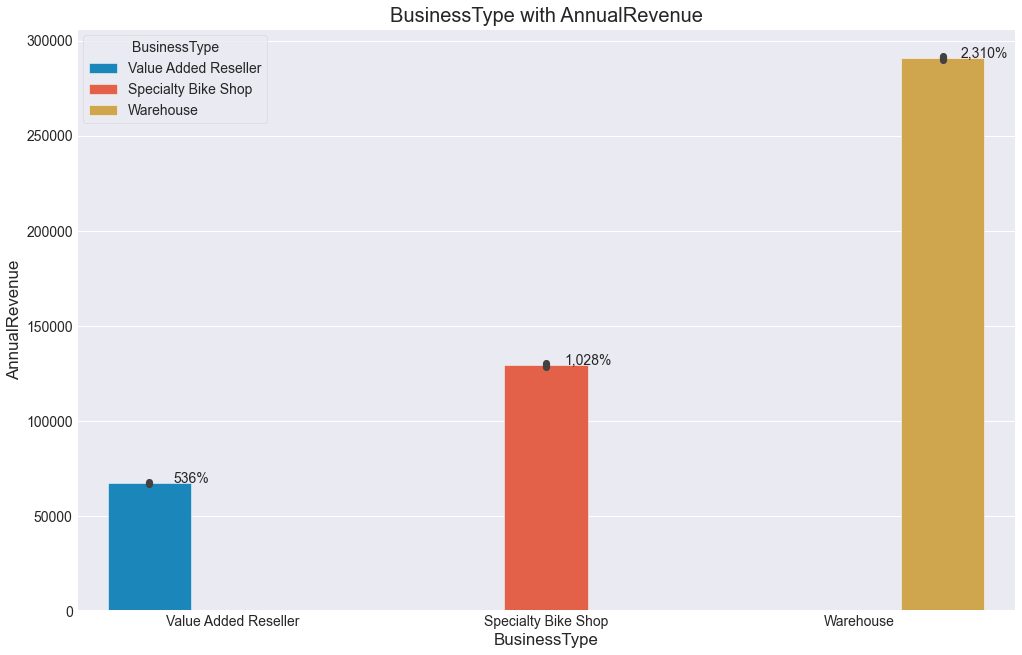

In [102]:
# Number of Revenue

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.barplot(data=Analysis_1, x='BusinessType',y='AnnualRevenue',hue = "BusinessType")
plt.title('BusinessType with AnnualRevenue', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

- Warehouse Business type also has the highest number of Annual Revenue

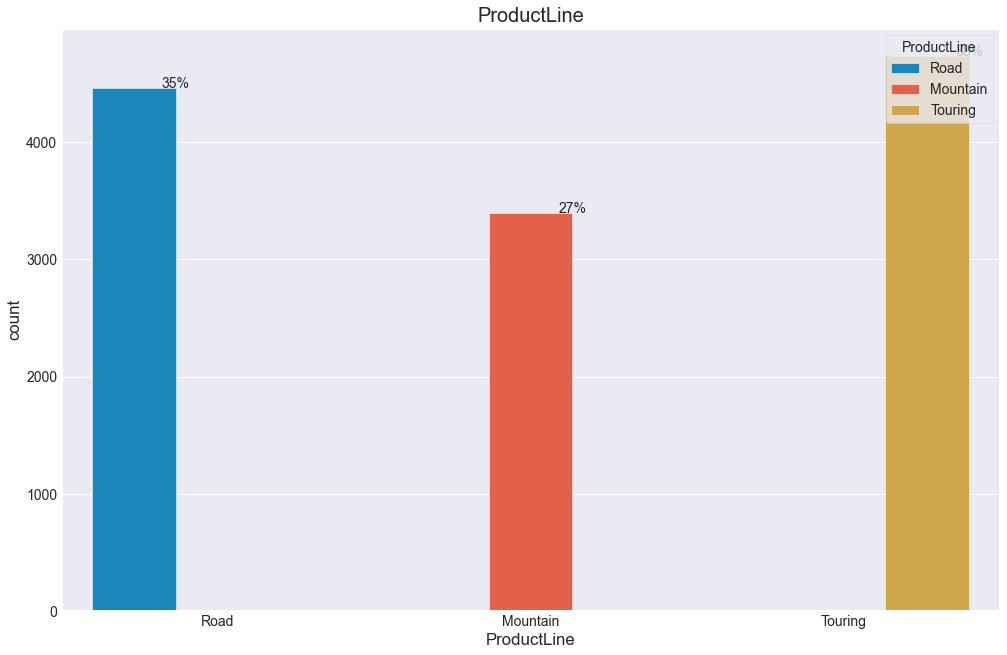

In [103]:
# Number of ProductLine

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x='ProductLine',hue = "ProductLine",data=Analysis_1)
plt.title('ProductLine', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [104]:
Get_summary_stats_category(Analysis_1, ['ProductLine'])

modal value for ProductLine is Touring
Unique values for ProductLine is ['Road' 'Mountain' 'Touring']
The number of unique values for ProductLine is 3
 The frequency for Touring is : 4736
The percentage of the modal score in the distribution is 37.60222310440651


Touring     4736
Road        4466
Mountain    3393
Name: ProductLine, dtype: int64

- Most of our Product line is through Touring

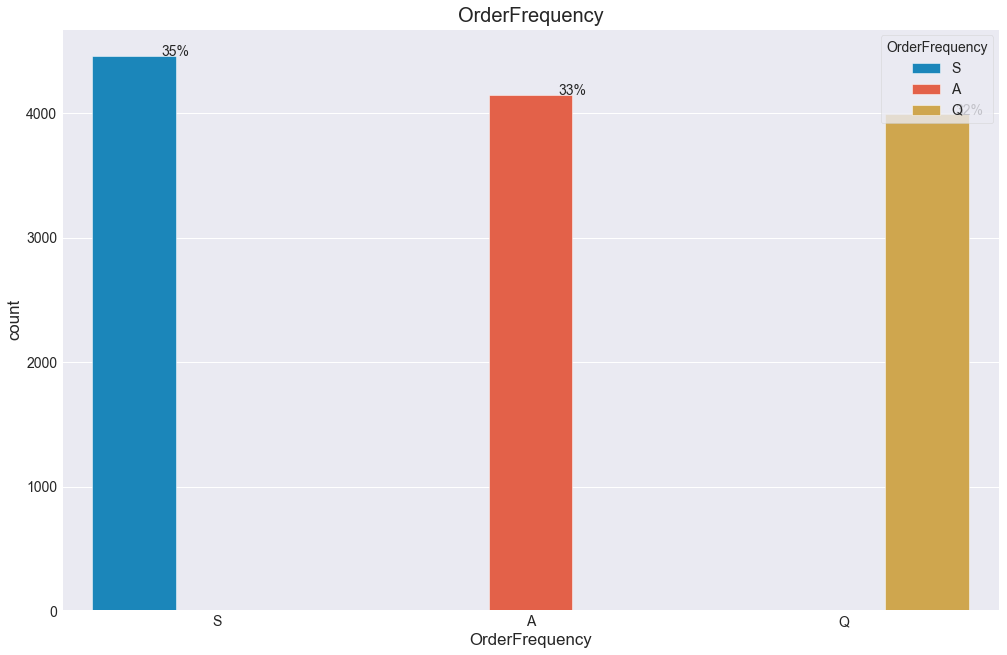

In [105]:
# OrderFrequency

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x='OrderFrequency',hue = "OrderFrequency",data=Analysis_1)
plt.title('OrderFrequency', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [106]:
Get_summary_stats_category(Analysis_1, ['OrderFrequency'])

modal value for OrderFrequency is S
Unique values for OrderFrequency is ['S' 'A' 'Q']
The number of unique values for OrderFrequency is 3
 The frequency for S is : 4459
The percentage of the modal score in the distribution is 35.40293767368003


S    4459
A    4147
Q    3989
Name: OrderFrequency, dtype: int64

- OrderFrequency S has the highest count.

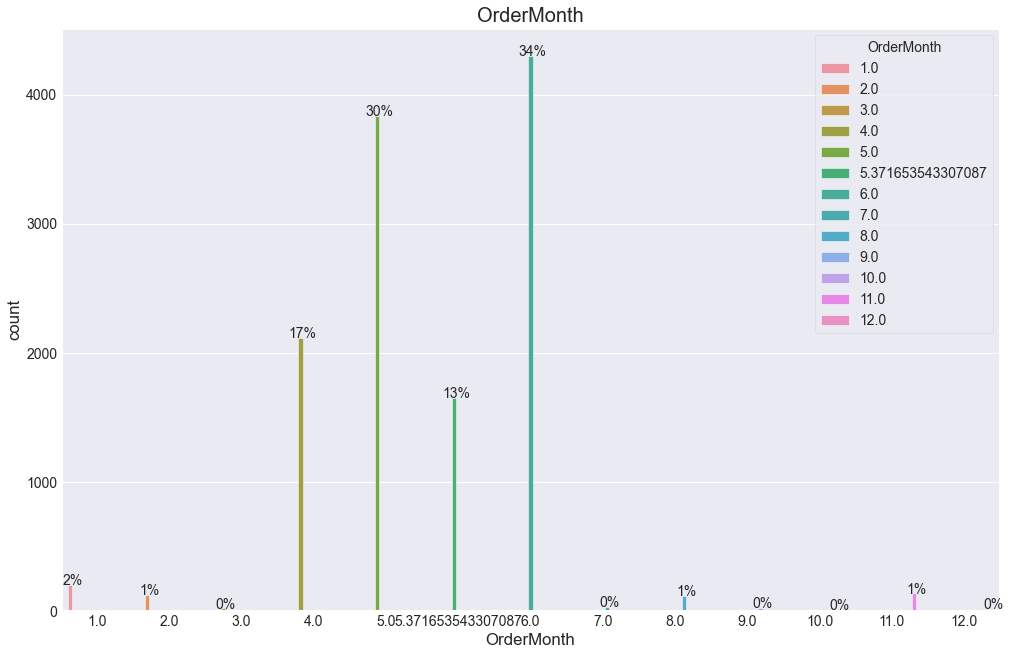

In [107]:
#OrderMonth


sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x='OrderMonth',hue = "OrderMonth",data=Analysis_1)
plt.title('OrderMonth', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [108]:
Get_summary_stats_category(Analysis_1, ['OrderMonth'])

modal value for OrderMonth is 6.0
Unique values for OrderMonth is [ 5.          6.          4.          5.37165354 12.         10.
  2.         11.          3.          8.          7.          1.
  9.        ]
The number of unique values for OrderMonth is 13
 The frequency for 6.0 is : 4299
The percentage of the modal score in the distribution is 34.132592298531165


6.000000     4299
5.000000     3835
4.000000     2117
5.371654     1649
1.000000      204
11.000000     138
2.000000      128
8.000000      116
7.000000       33
9.000000       27
Name: OrderMonth, dtype: int64

- The 6month(june) is the month with the highest order.
- The 3month(March) has the lowest order

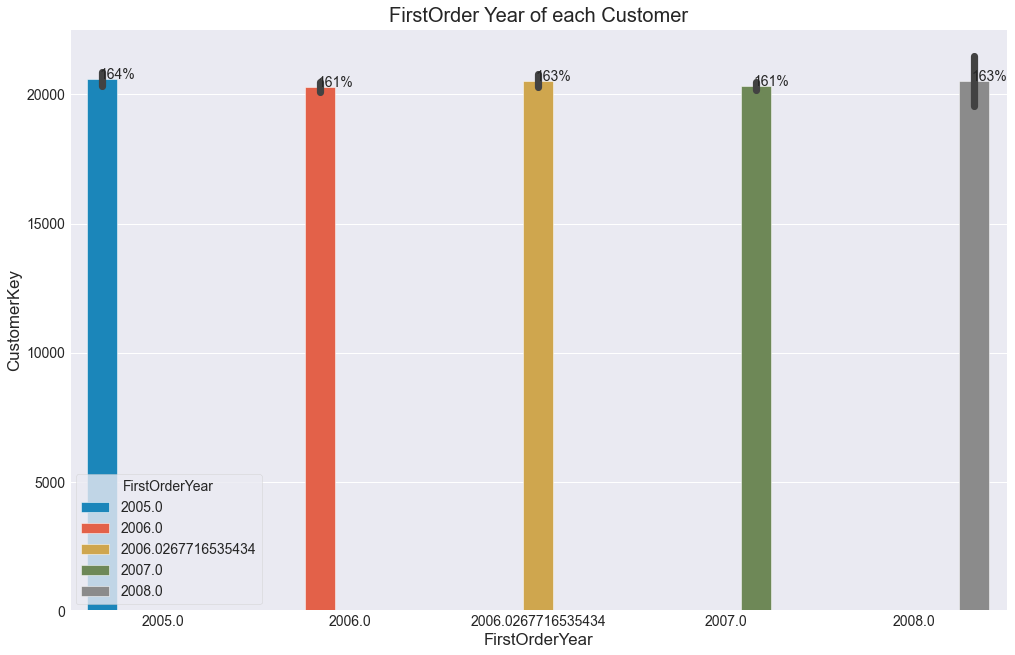

In [109]:
# FirstOrder Year of each Customer

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.barplot(data=Analysis_1, x='FirstOrderYear',y='CustomerKey',hue = "FirstOrderYear")
plt.title('FirstOrder Year of each Customer', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

- Customers firstorder year is kind of close with 2005 having the most firstorder and 2007 being the least

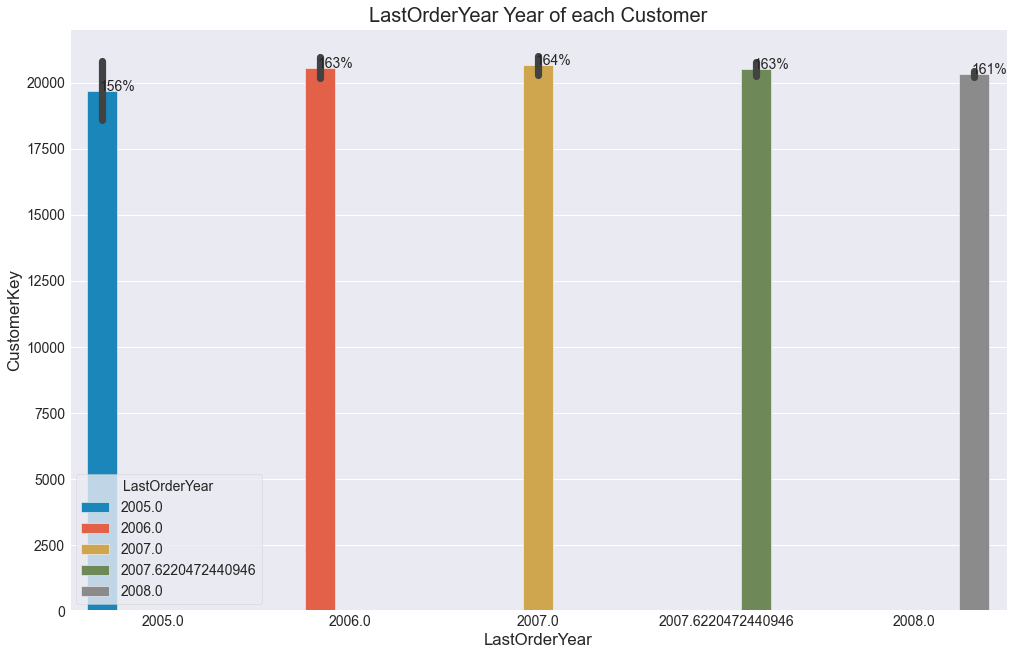

In [110]:
# LastOrderYear Year of each Customer

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.barplot(data=Analysis_1, x='LastOrderYear',y='CustomerKey',hue = "LastOrderYear")
plt.title('LastOrderYear Year of each Customer', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

- Customers Lastorder year is also kind of close with 2007 having the most laststorder

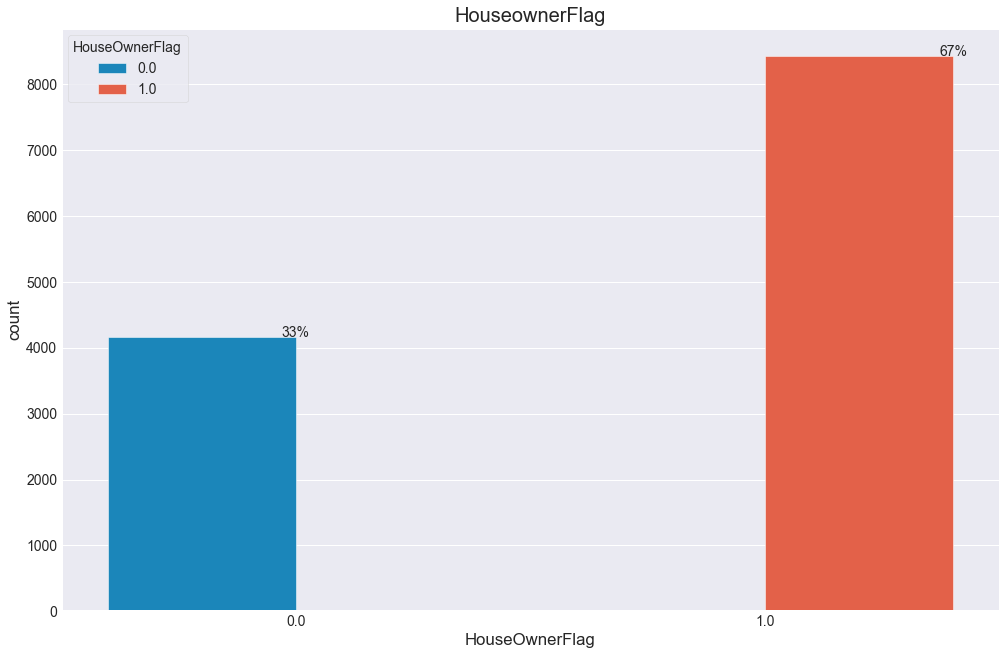

In [161]:
# HouseOwnerFlag

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.countplot(x="HouseOwnerFlag", hue = "HouseOwnerFlag", data=Analysis_1)
plt.title('HouseownerFlag', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [112]:
Get_summary_stats_category(Analysis_1, ['HouseOwnerFlag'])

modal value for HouseOwnerFlag is 1.0
Unique values for HouseOwnerFlag is [1. 0.]
The number of unique values for HouseOwnerFlag is 2
 The frequency for 1.0 is : 8431
The percentage of the modal score in the distribution is 66.9392616117507


1.0    8431
0.0    4164
Name: HouseOwnerFlag, dtype: int64

- House owners are the major purchasers of these products probably due house needs.

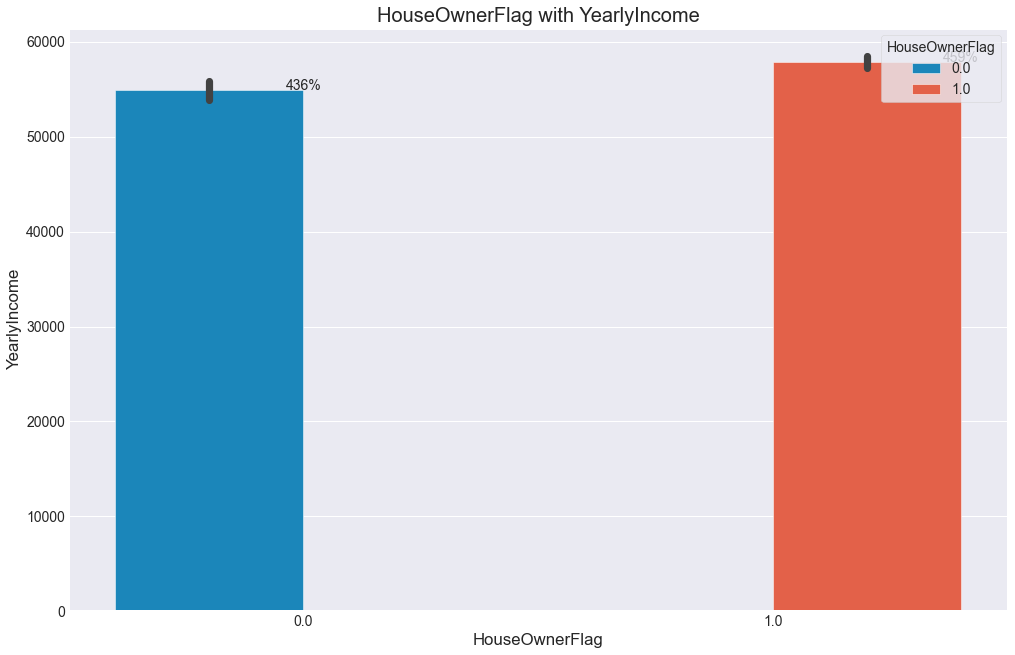

In [113]:
# BusinessType with AnnualSales

sns.set_style('')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_1))
ax=sns.barplot(data=Analysis_1, x='HouseOwnerFlag',y='YearlyIncome',hue = "HouseOwnerFlag")
plt.title('HouseOwnerFlag with YearlyIncome', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

- House owners has the highest yearly income

**Finance Analysis**

In [114]:
#copying the dataframe for ease of with analysis
Analysis_2 = finance.copy()

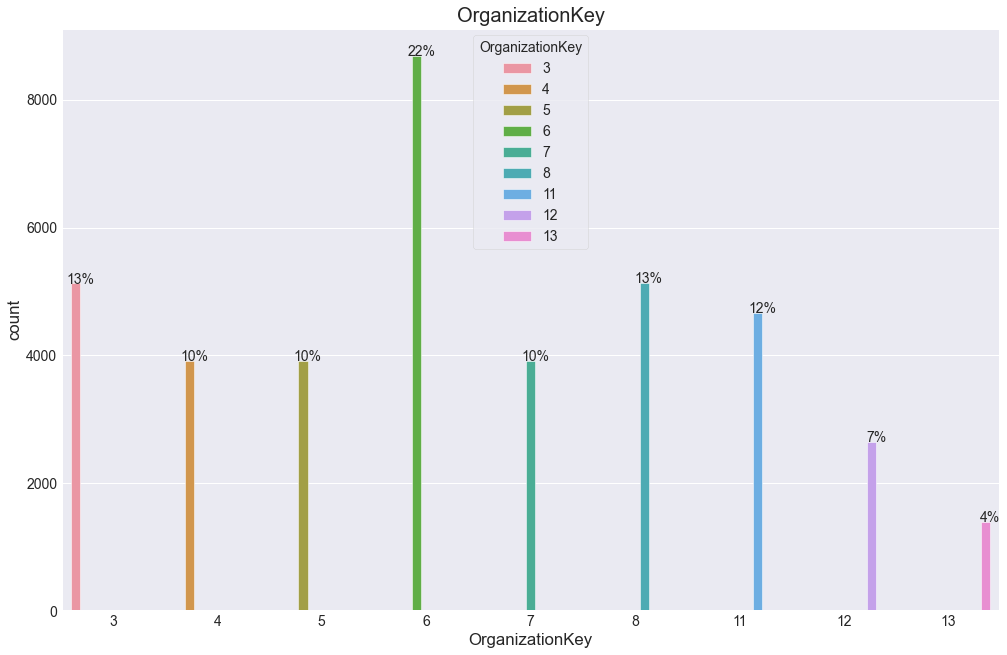

In [115]:
# Organization

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_2))
ax=sns.countplot(x="OrganizationKey", hue = "OrganizationKey", data=Analysis_2)
plt.title('OrganizationKey', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [116]:
Get_summary_stats_category(Analysis_2, ['OrganizationKey'])

modal value for OrganizationKey is 6
Unique values for OrganizationKey is [ 3  4  5  6  7  8 11 12 13]
The number of unique values for OrganizationKey is 9
 The frequency for 6 is : 8688
The percentage of the modal score in the distribution is 22.045725595676114


6     8688
8     5137
3     5127
11    4663
7     3921
5     3913
4     3911
12    2647
13    1402
Name: OrganizationKey, dtype: int64

#### Organizations in respect to their keys

1. AdventureWorks Cycle
2. North America Operations
3. Northeast Division
4. Northwest Division
5. Central Division
6. Southeast Division
7. Southwest Division
8. Canadian Division
9. European Operations
10. Pacific Operations
11. France
12. Germany
13. Australia
14. USA Operations

- Though we have 14 organizations, we only have 9 organizations in the dataset used.

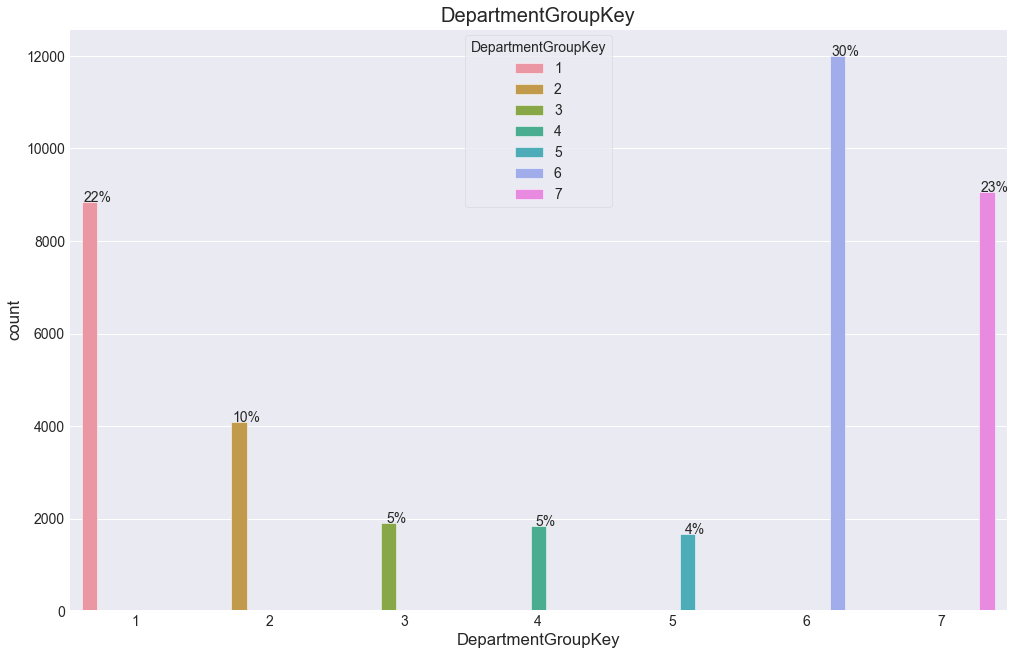

In [117]:
# DepartmentGroupKey

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_2))
ax=sns.countplot(x="DepartmentGroupKey", hue = "DepartmentGroupKey", data=Analysis_2)
plt.title('DepartmentGroupKey', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [118]:
Get_summary_stats_category(Analysis_2, ['DepartmentGroupKey'])

modal value for DepartmentGroupKey is 6
Unique values for DepartmentGroupKey is [1 2 6 7 3 4 5]
The number of unique values for DepartmentGroupKey is 7
 The frequency for 6 is : 12003
The percentage of the modal score in the distribution is 30.457509705904744


6    12003
7     9057
1     8843
2     4088
3     1908
4     1836
5     1674
Name: DepartmentGroupKey, dtype: int64

**DepartmentGroupKey**

1- Corporate

2- Executive General

3- Inventory Management

4- Manufacturing

5- Quality Assurance

6- Research & Development

7- Sales&Marketing

We could see that the **Reseach & Development department** has the highest occurence followed by the **Sales & Marketing department**

Meaning that these departments are the major departments neccessary for sales improvement.

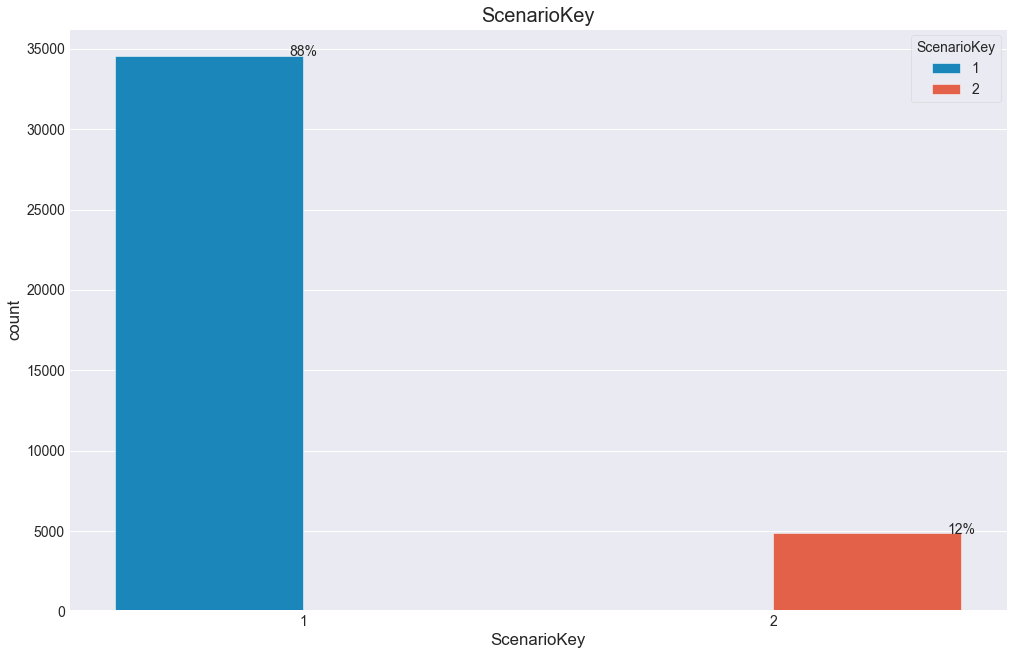

In [119]:
# ScenarioKey
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_2))
ax=sns.countplot(x="ScenarioKey", hue = "ScenarioKey", data=Analysis_2)
plt.title('ScenarioKey', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [120]:
Get_summary_stats_category(Analysis_2, ['ScenarioKey'])

modal value for ScenarioKey is 1
Unique values for ScenarioKey is [1 2]
The number of unique values for ScenarioKey is 2
 The frequency for 1 is : 34563
The percentage of the modal score in the distribution is 87.7033165013068


1    34563
2     4846
Name: ScenarioKey, dtype: int64

**Meaning of scenario keys**

1- Actual

2- Budget

We could also note that the **actual scenerio** far supercedes the **budget scenerio** while there wasn't any **forecast scenerio**

**Product Analysis**

In [121]:
#copying the dataframe for ease of with analysis
Analysis_eda = product

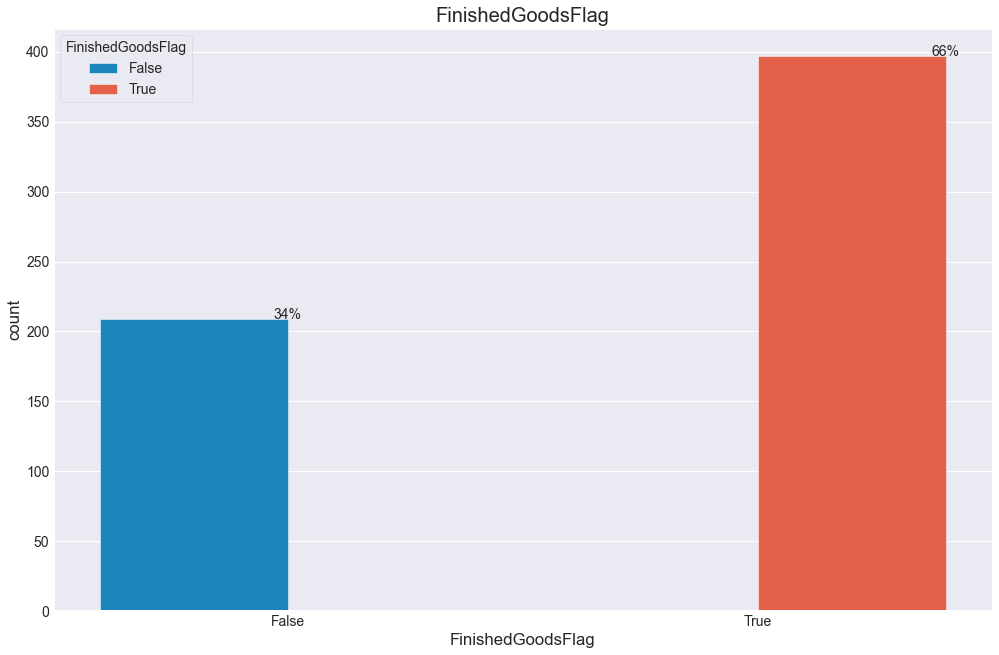

In [122]:
# FinishedGoodsFlag

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_eda))
ax=sns.countplot(x="FinishedGoodsFlag", hue = "FinishedGoodsFlag", data=Analysis_eda)
plt.title('FinishedGoodsFlag', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [123]:
Get_summary_stats_category(Analysis_eda, ['FinishedGoodsFlag'])

modal value for FinishedGoodsFlag is True
Unique values for FinishedGoodsFlag is [False  True]
The number of unique values for FinishedGoodsFlag is 2
 The frequency for True is : 397
The percentage of the modal score in the distribution is 65.51155115511551


True     397
False    209
Name: FinishedGoodsFlag, dtype: int64

- Most products purchased are finished goods

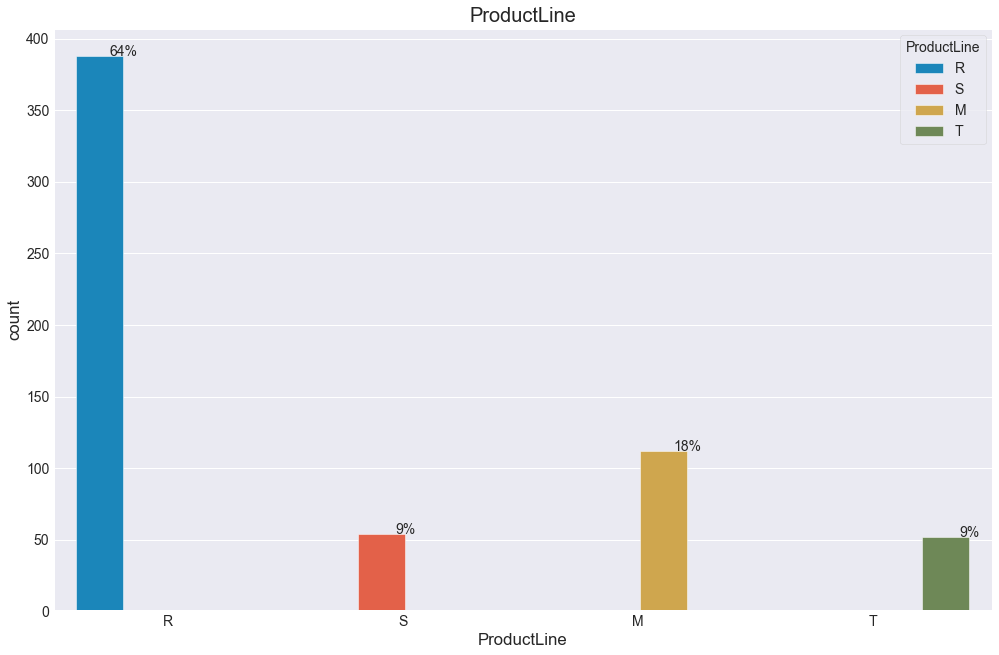

In [124]:
# ProductLine

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_eda))
ax=sns.countplot(x="ProductLine", hue = "ProductLine", data=Analysis_eda)
plt.title('ProductLine', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [125]:
Get_summary_stats_category(Analysis_eda, ['ProductLine'])

modal value for ProductLine is R 
Unique values for ProductLine is ['R ' 'S ' 'M ' 'T ']
The number of unique values for ProductLine is 4
 The frequency for R  is : 388
The percentage of the modal score in the distribution is 64.02640264026402


R     388
M     112
S      54
T      52
Name: ProductLine, dtype: int64

- The most used productline is R

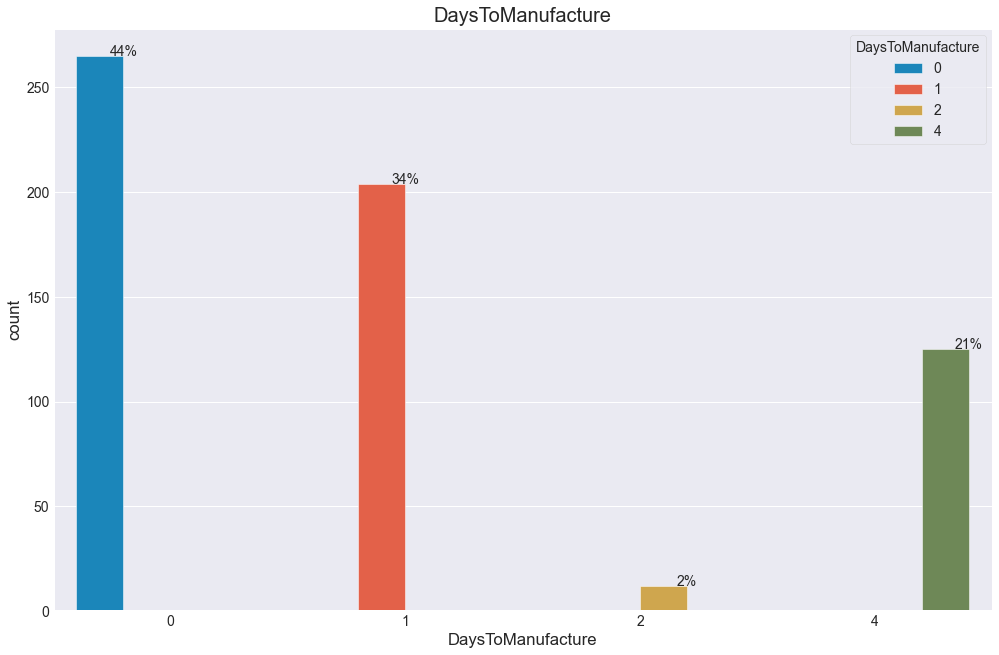

In [126]:
#DaysToManufacture

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_eda))
ax=sns.countplot(x="DaysToManufacture", hue = "DaysToManufacture", data=Analysis_eda)
plt.title('DaysToManufacture', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [127]:
Get_summary_stats_category(Analysis_eda, ['DaysToManufacture'])

modal value for DaysToManufacture is 0
Unique values for DaysToManufacture is [0 1 2 4]
The number of unique values for DaysToManufacture is 4
 The frequency for 0 is : 265
The percentage of the modal score in the distribution is 43.72937293729373


0    265
1    204
4    125
2     12
Name: DaysToManufacture, dtype: int64

- Most products are produce in less than a day.

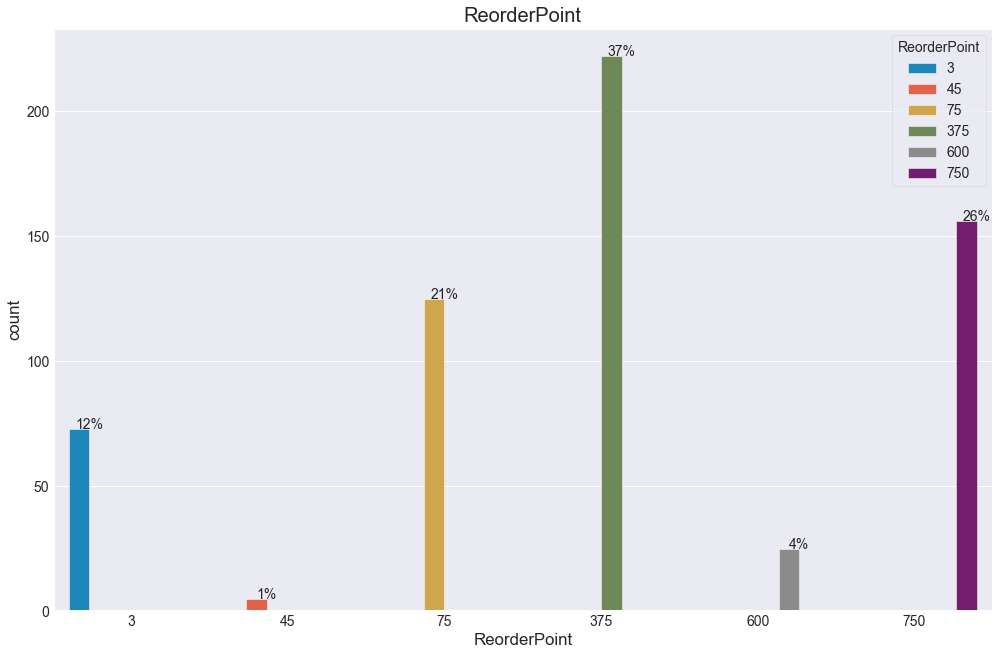

In [128]:
# ReorderPoint

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_eda))
ax=sns.countplot(x="ReorderPoint", hue = "ReorderPoint", data=Analysis_eda)
plt.title('ReorderPoint', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [129]:
Get_summary_stats_category(Analysis_eda, ['ReorderPoint'])

modal value for ReorderPoint is 375
Unique values for ReorderPoint is [750 600 375  45   3  75]
The number of unique values for ReorderPoint is 6
 The frequency for 375 is : 222
The percentage of the modal score in the distribution is 36.633663366336634


375    222
750    156
75     125
3       73
600     25
45       5
Name: ReorderPoint, dtype: int64

- 375 is the most reorder point 

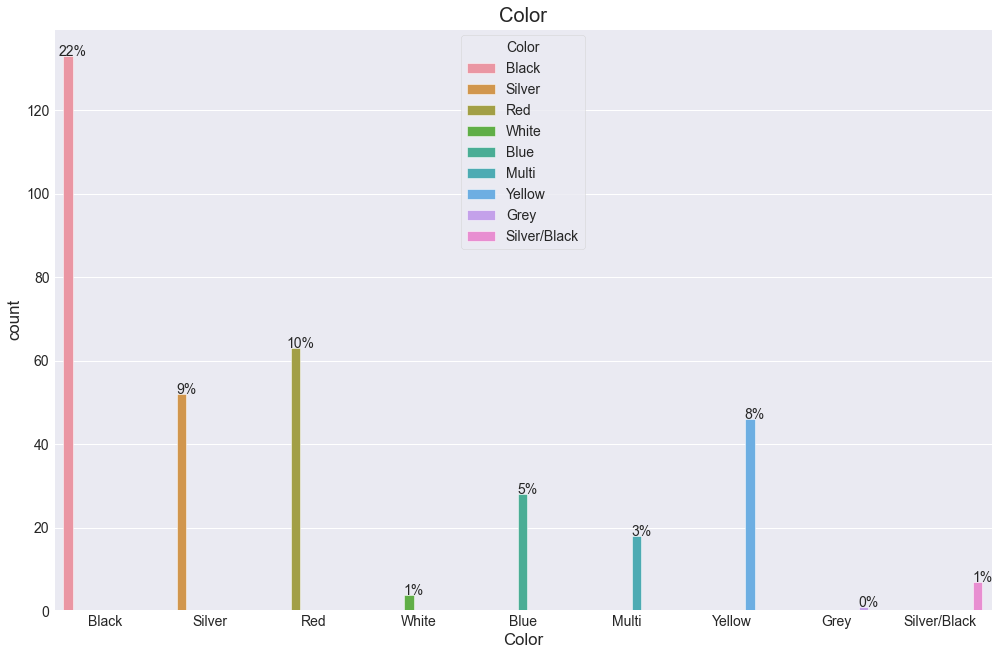

In [130]:
# Color

sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
total = float(len(Analysis_eda))
ax=sns.countplot(x="Color", hue = "Color", data=Analysis_eda)
plt.title('Color', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [131]:
Get_summary_stats_category(Analysis_eda, ['Color'])

modal value for Color is Black
Unique values for Color is [nan 'Black' 'Silver' 'Red' 'White' 'Blue' 'Multi' 'Yellow' 'Grey'
 'Silver/Black']
The number of unique values for Color is 9
 The frequency for Black is : 133
The percentage of the modal score in the distribution is 21.947194719471945


Black           133
Red              63
Silver           52
Yellow           46
Blue             28
Multi            18
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

- Black is the most used color for the products, probably its the most relatable color to the customers 

<a name="Dates"></a>
## 7. Date features EDA

In [132]:
Analysis_1['DateFirstPurchase'] = pd.to_datetime(Analysis_1['DateFirstPurchase'])

In [133]:
# Extract day, month year and hour from the Datetime column
# day
Analysis_1['Datetime_day_Purchase'] = Analysis_1.DateFirstPurchase.dt.day

# month
Analysis_1['Datetime_month_Purchase'] = Analysis_1.DateFirstPurchase.dt.month
 
# year
Analysis_1['Datetime_year_Purchase'] = Analysis_1.DateFirstPurchase.dt.year


# Preview engineered date features
Analysis_1[['DateFirstPurchase', 'Datetime_day_Purchase', 'Datetime_month_Purchase', 'Datetime_year_Purchase']].head()

,DateFirstPurchase,Datetime_day_Purchase,Datetime_month_Purchase,Datetime_year_Purchase
0,2007-12-25,25,12,2007
1,2007-11-03,3,11,2007
2,2006-03-22,22,3,2006
3,2006-03-24,24,3,2006
4,2007-09-14,14,9,2007


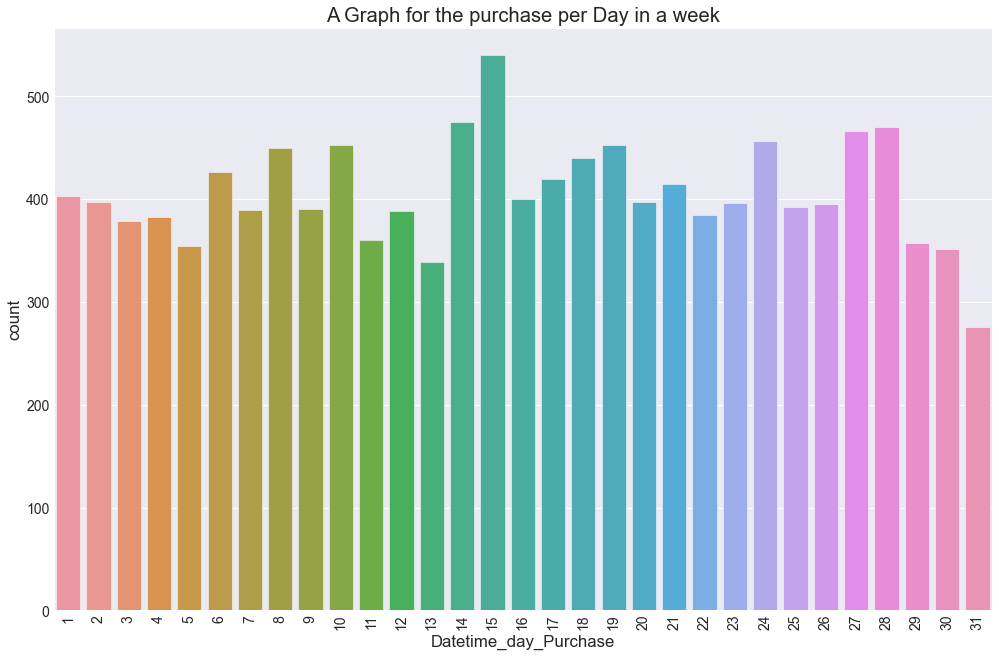

In [134]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(data= Analysis_1, x='Datetime_day_Purchase')
plt.tick_params(axis='x', rotation=90)
plt.title('A Graph for the purchase per Day in a week')
plt.show()

In [135]:
Get_summary_stats_category(Analysis_1, ['Datetime_day_Purchase'])

modal value for Datetime_day_Purchase is 15
Unique values for Datetime_day_Purchase is [25  3 22 24 14 21  4  1 28  5 19  6 30 17 23 29 12 18 26  9  8  7 15 16
 11 31 27 13  2 10 20]
The number of unique values for Datetime_day_Purchase is 31
 The frequency for 15 is : 540
The percentage of the modal score in the distribution is 4.287415641127431


15    540
14    475
28    470
27    466
24    456
10    453
19    453
8     450
18    440
6     426
Name: Datetime_day_Purchase, dtype: int64

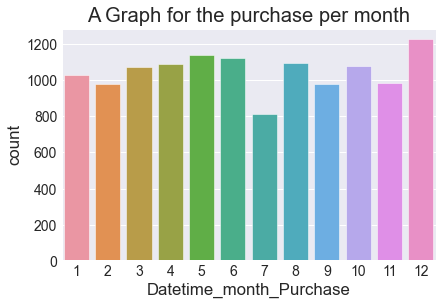

In [136]:
sns.countplot(data= Analysis_1, x='Datetime_month_Purchase')
plt.title('A Graph for the purchase per month')
plt.show()

In [137]:
Get_summary_stats_category(Analysis_1, ['Datetime_month_Purchase'])

modal value for Datetime_month_Purchase is 12
Unique values for Datetime_month_Purchase is [12 11  3  9  8  2  5  7  4 10  6  1]
The number of unique values for Datetime_month_Purchase is 12
 The frequency for 12 is : 1227
The percentage of the modal score in the distribution is 9.741961095672886


12    1227
5     1136
6     1123
8     1096
4     1090
10    1075
3     1074
1     1027
11     982
9      978
Name: Datetime_month_Purchase, dtype: int64

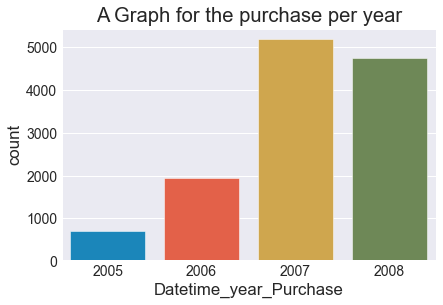

In [138]:
sns.countplot(data= Analysis_1, x='Datetime_year_Purchase')
plt.title('A Graph for the purchase per year')
plt.show()

In [139]:
Get_summary_stats_category(Analysis_1, ['Datetime_year_Purchase'])

modal value for Datetime_year_Purchase is 2007
Unique values for Datetime_year_Purchase is [2007 2006 2008 2005]
The number of unique values for Datetime_year_Purchase is 4
 The frequency for 2007 is : 5202
The percentage of the modal score in the distribution is 41.30210400952759


2007    5202
2008    4762
2006    1939
2005     692
Name: Datetime_year_Purchase, dtype: int64

<a name="Encoding"></a>
## 7. ENCODING

In [140]:
Analysis_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             606 non-null    int64  
 1   ProductAlternateKey    606 non-null    object 
 2   ProductSubcategoryKey  606 non-null    int64  
 3   EnglishProductName     606 non-null    object 
 4   StandardCost           606 non-null    float64
 5   FinishedGoodsFlag      606 non-null    bool   
 6   Color                  352 non-null    object 
 7   SafetyStockLevel       606 non-null    int64  
 8   ReorderPoint           606 non-null    int64  
 9   ListPrice              606 non-null    float64
 10  DaysToManufacture      606 non-null    int64  
 11  ProductLine            606 non-null    object 
 12  DealerPrice            606 non-null    float64
 13  ModelName              606 non-null    object 
 14  StartDate              606 non-null    object 
 15  Status

In [141]:
#Checking for unique values
Analysis_eda.nunique()

ProductKey               606
ProductAlternateKey      504
ProductSubcategoryKey     38
EnglishProductName       504
StandardCost             135
FinishedGoodsFlag          2
Color                      9
SafetyStockLevel           6
ReorderPoint               6
ListPrice                121
DaysToManufacture          4
ProductLine                4
DealerPrice              121
ModelName                120
StartDate                  4
Status                     2
ColorProductLine           9
dtype: int64

In [142]:
Analysis_eda.loc[:, ['Color', 'FinishedGoodsFlag','ProductLine', 'Status','ColorProductLine']] = Analysis_eda[
    ['Color', 'FinishedGoodsFlag', 'ProductLine', 'Status','ColorProductLine']
].apply(LabelEncoder().fit_transform)

In [143]:
Analysis_eda.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,ModelName,StartDate,Status,ColorProductLine
0,1,AR-5381,0,Adjustable Race,434.265829,0,9,1000,750,747.661762,0,1,448.59706,Not_Available,01/06/1998 00:00,0,0
1,2,BA-8327,0,Bearing Ball,434.265829,0,9,1000,750,747.661762,0,1,448.59706,Not_Available,01/06/1998 00:00,0,0
2,3,BE-2349,0,BB Ball Bearing,434.265829,0,9,800,600,747.661762,1,1,448.59706,Not_Available,01/06/1998 00:00,0,0
3,4,BE-2908,0,Headset Ball Bearings,434.265829,0,9,800,600,747.661762,0,1,448.59706,Not_Available,01/06/1998 00:00,0,0
4,5,BL-2036,0,Blade,434.265829,0,9,800,600,747.661762,1,1,448.59706,Not_Available,01/06/1998 00:00,0,0


In [144]:
#dropping categorical columns with many classes in customer dataset
Analysis_eda = Analysis_eda.drop(columns = 'EnglishProductName')
Analysis_eda = Analysis_eda.drop(columns = 'ProductAlternateKey')
Analysis_eda = Analysis_eda.drop(columns ='ModelName')

Analysis_eda.head()

,ProductKey,ProductSubcategoryKey,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,StartDate,Status,ColorProductLine
0,1,0,434.265829,0,9,1000,750,747.661762,0,1,448.59706,01/06/1998 00:00,0,0
1,2,0,434.265829,0,9,1000,750,747.661762,0,1,448.59706,01/06/1998 00:00,0,0
2,3,0,434.265829,0,9,800,600,747.661762,1,1,448.59706,01/06/1998 00:00,0,0
3,4,0,434.265829,0,9,800,600,747.661762,0,1,448.59706,01/06/1998 00:00,0,0
4,5,0,434.265829,0,9,800,600,747.661762,1,1,448.59706,01/06/1998 00:00,0,0


<a name="Correlations"></a>
## 8. Correlations - EDA

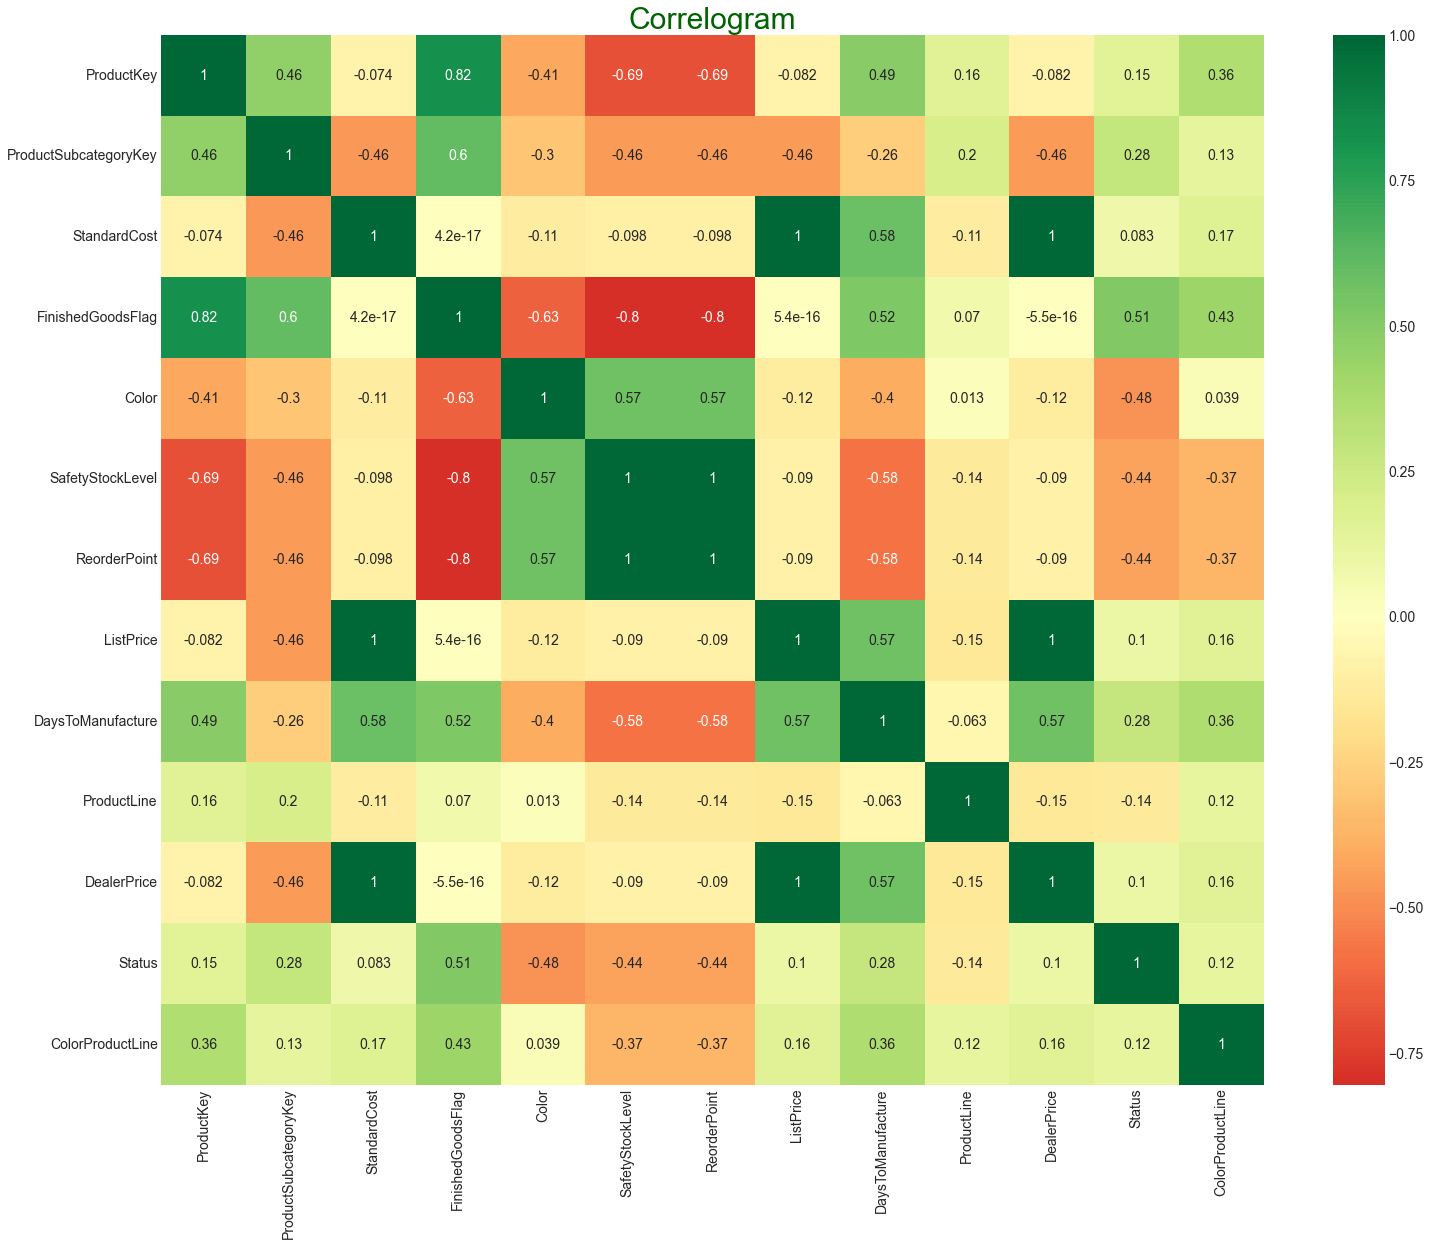

In [145]:
# Quantify correlations
corr = Analysis_eda.corr()
plt.figure(figsize = (22, 18))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 30, color = 'darkgreen')
plt.show()

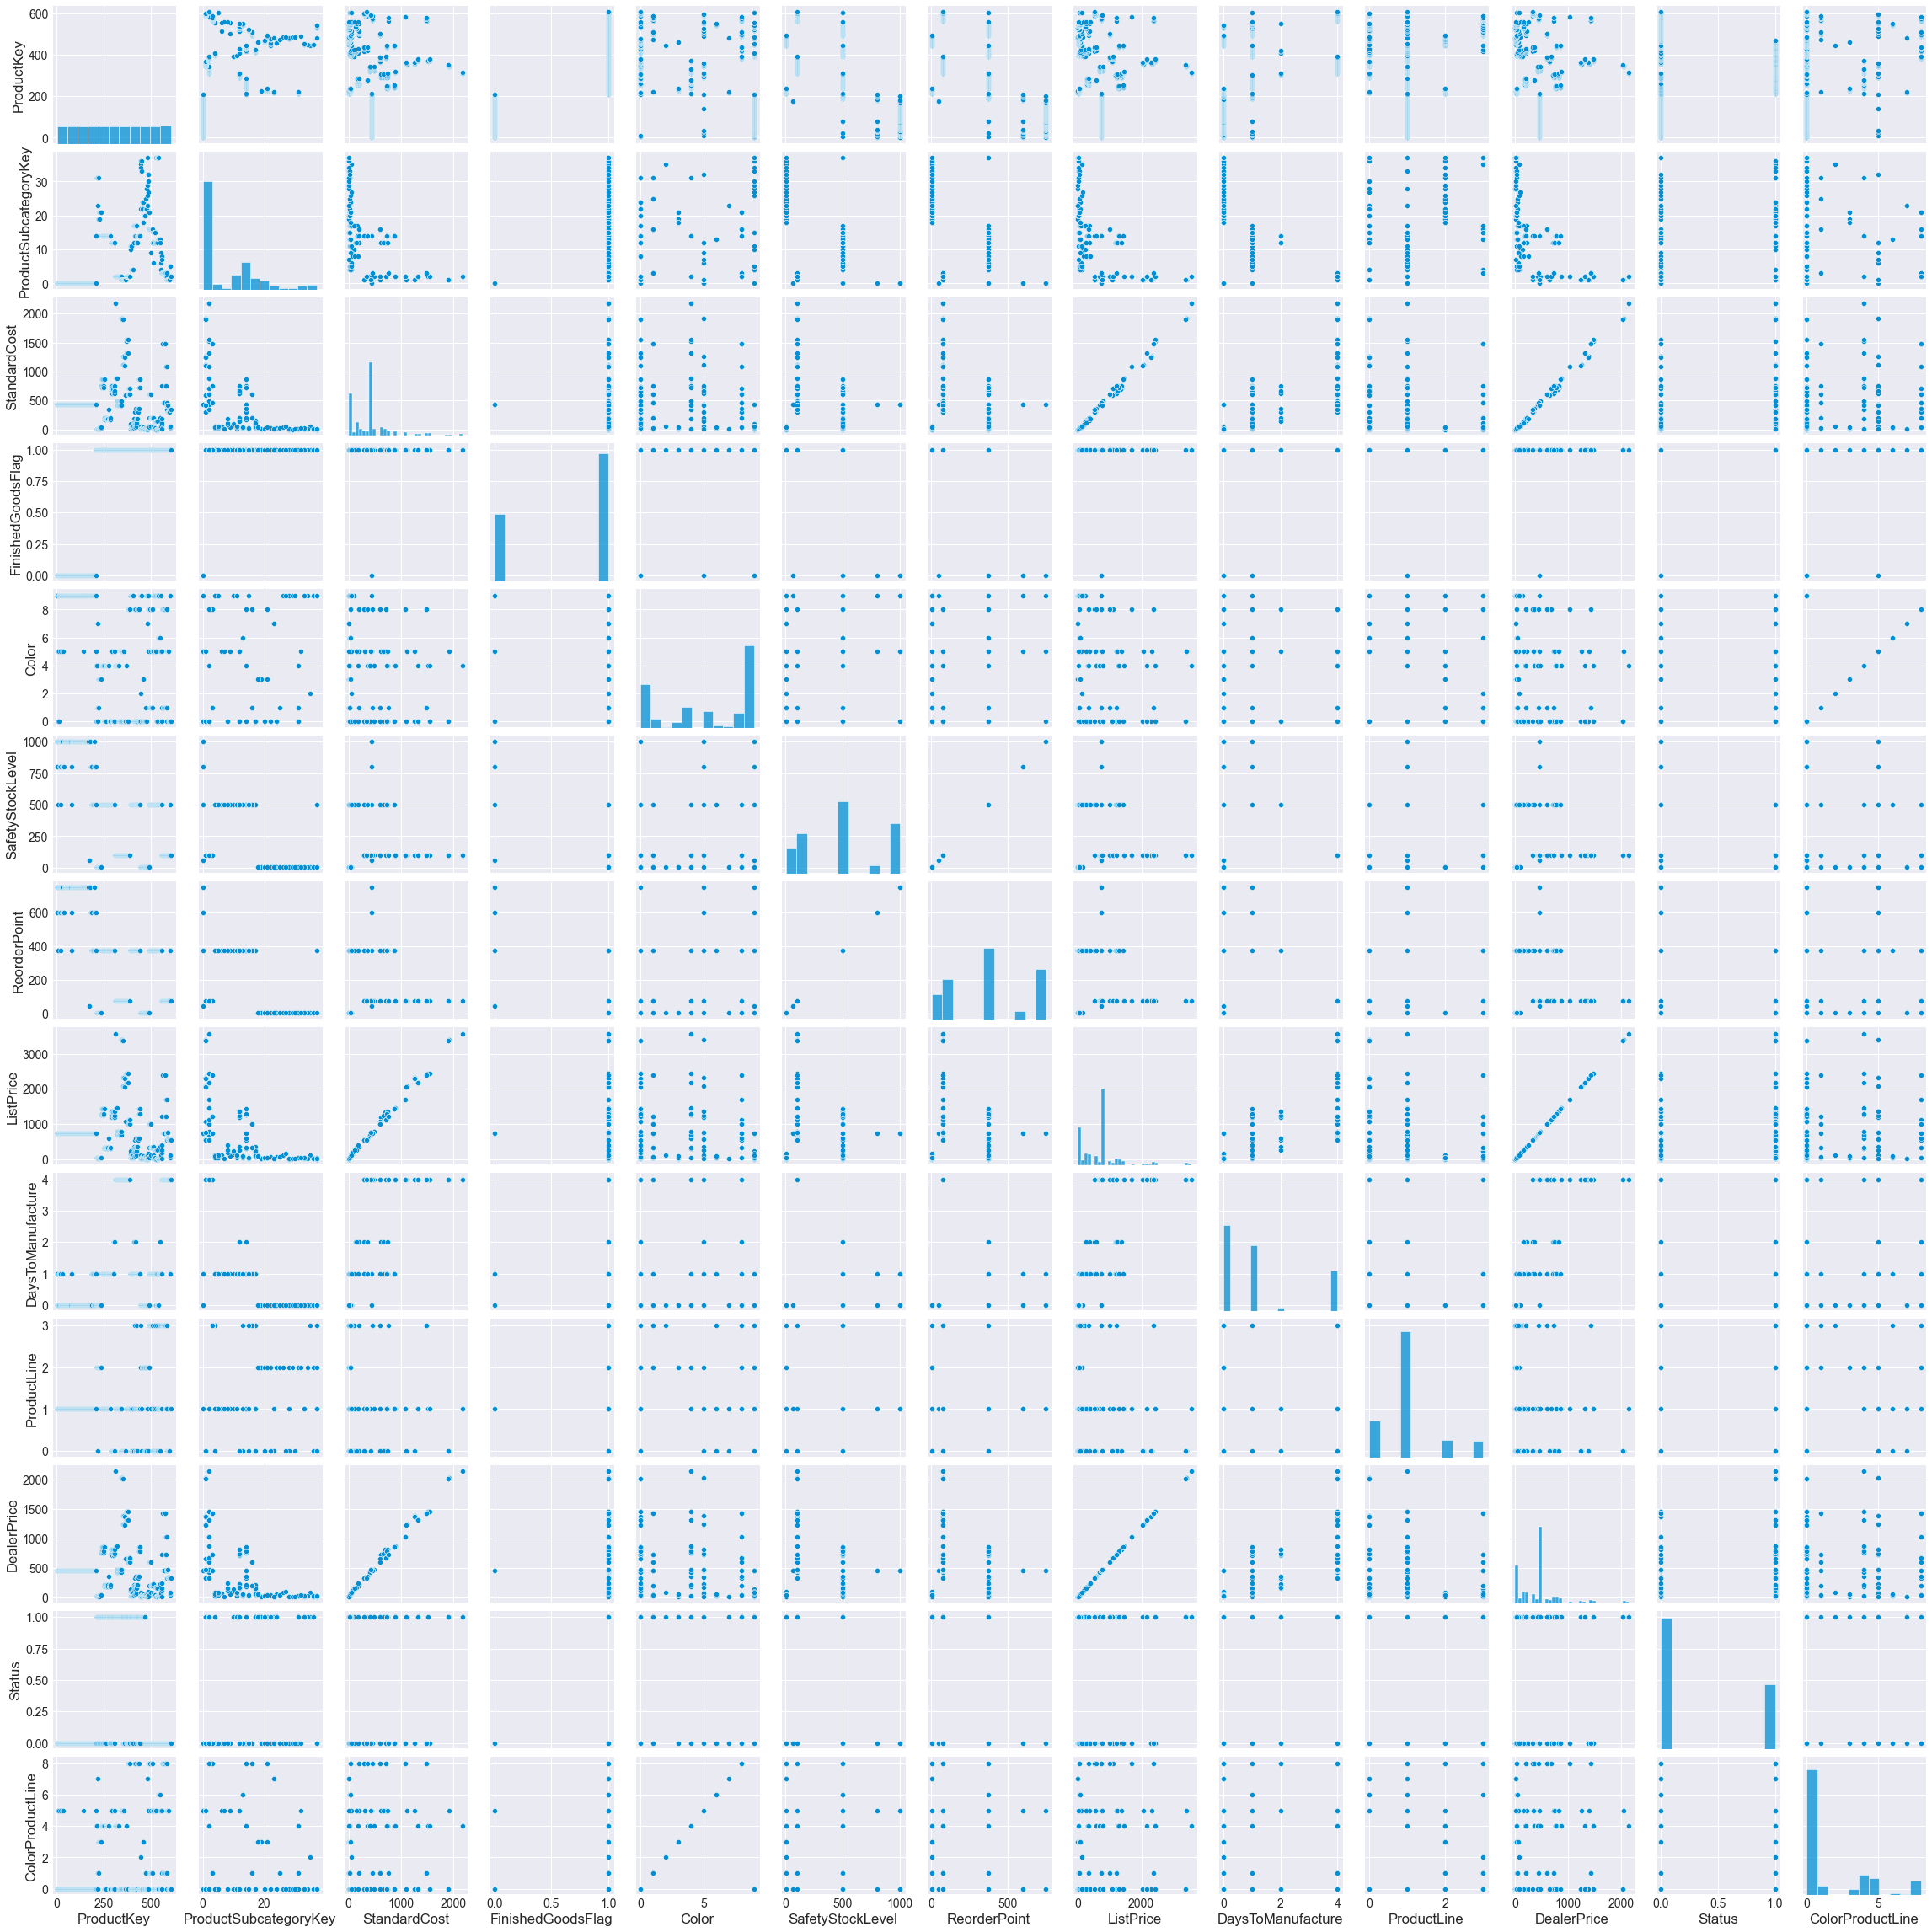

In [146]:
#Exploring relationships
sns.pairplot(Analysis_eda)

- We could see that **FinishedGoodsFlag** has a strong correlation with **product Key** of 82%
- Also **FinishedGoodsFlag** and **ProductsSubcateoryKey** has a Strong correlation of 60%

<a name="Feature"></a>
## 9. Feature Engineering - EDA

#### Feature Engineering
---

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Some of the means of feature engineering as listed from our checklist are:

- Discretize continuous features.
- Decompose features (e.g., categorical, date/time, etc.).
- Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
- Aggregate features into promising new features.

There is no need to discretize continuous feature columns because none of the feature columns are best suited for discretization, there is no feature column we can decompose, there are no transformations we can apply to improve the data and there is no need to aggregate the features into a new feature.

We could however attempt to decompose the `StartDate` and by simplifying the year column to a much smaller value for the machine learning model. It wouldn't make much difference though so we can leave it just the way it is. 

[Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114) by [Emre Rençberoğlu](https://medium.com/@emrerencberoglu)

In [147]:
Analysis_eda['StartDate'] = pd.to_datetime(Analysis_eda['StartDate'])

In [148]:
# Extract day, month year and hour from the Datetime column
# day
Analysis_eda['Start_day'] = Analysis_eda.StartDate.dt.day

# month
Analysis_eda['Start_month'] = Analysis_eda.StartDate.dt.month
 
# year
Analysis_eda['Start_year'] = Analysis_eda.StartDate.dt.year


# Preview engineered date features
Analysis_eda[['StartDate', 'Start_day', 'Start_month', 'Start_year']].head()

,StartDate,Start_day,Start_month,Start_year
0,1998-01-06,6,1,1998
1,1998-01-06,6,1,1998
2,1998-01-06,6,1,1998
3,1998-01-06,6,1,1998
4,1998-01-06,6,1,1998


In [149]:
# we further drop the startdate
Analysis_eda = Analysis_eda.drop(columns = 'StartDate')

In [150]:
target_column = 'ListPrice'

target = Analysis_eda[target_column]
data = Analysis_eda.drop(target_column, axis=1)

Now that we've successfully addressed our dataset (by splitting it into the data and target). We then proceed to split the data into the train, dev (cross-validation), and test set.

In order to split the dataset, we would be making use of the SciKit-Learn `train_test_split` function.

In [151]:
Analysis_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             606 non-null    int64  
 1   ProductSubcategoryKey  606 non-null    int64  
 2   StandardCost           606 non-null    float64
 3   FinishedGoodsFlag      606 non-null    int64  
 4   Color                  606 non-null    int32  
 5   SafetyStockLevel       606 non-null    int64  
 6   ReorderPoint           606 non-null    int64  
 7   ListPrice              606 non-null    float64
 8   DaysToManufacture      606 non-null    int64  
 9   ProductLine            606 non-null    int32  
 10  DealerPrice            606 non-null    float64
 11  Status                 606 non-null    int32  
 12  ColorProductLine       606 non-null    int32  
 13  Start_day              606 non-null    int64  
 14  Start_month            606 non-null    int64  
 15  Start_

In [152]:
X_train, X_test, y_train, y_test = train_test_split(Analysis_eda, target, test_size=.25, random_state=42)

In [153]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

In [154]:
y_train.shape, y_test.shape, y_val.shape

((340,), (152,), (114,))

In [155]:
X_train.head()

,ProductKey,ProductSubcategoryKey,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,Status,ColorProductLine,Start_day,Start_month,Start_year
161,162,0,434.265829,0,9,1000,750,747.661762,0,1,448.59706,0,0,6,1,1998
596,597,1,294.579700,1,0,100,75,539.990000,4,0,323.99400,0,0,7,1,2007
275,276,14,352.139400,1,4,500,375,594.830000,1,1,356.89800,1,4,7,1,2005
562,563,3,1481.937900,1,8,100,75,2384.070000,4,3,1430.44200,0,8,7,1,2007
492,493,16,199.851900,1,8,500,375,333.420000,1,3,200.05200,0,8,7,1,2007


In [156]:
y_test.head()

572    2384.070000
289    1364.500000
76      747.661762
78      747.661762
182     747.661762
Name: ListPrice, dtype: float64

In [157]:
X_train

,ProductKey,ProductSubcategoryKey,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,ListPrice,DaysToManufacture,ProductLine,DealerPrice,Status,ColorProductLine,Start_day,Start_month,Start_year
161,162,0,434.265829,0,9,1000,750,747.661762,0,1,448.59706,0,0,6,1,1998
596,597,1,294.579700,1,0,100,75,539.990000,4,0,323.99400,0,0,7,1,2007
275,276,14,352.139400,1,4,500,375,594.830000,1,1,356.89800,1,4,7,1,2005
562,563,3,1481.937900,1,8,100,75,2384.070000,4,3,1430.44200,0,8,7,1,2007
492,493,16,199.851900,1,8,500,375,333.420000,1,3,200.05200,0,8,7,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,19,5.705200,1,3,4,3,8.644200,0,2,5.18650,1,3,7,1,2005
410,411,17,92.807100,1,0,500,375,209.025000,1,0,125.41500,1,0,7,1,2006
215,216,31,13.878200,1,0,4,3,33.644200,0,2,20.18650,1,0,7,1,2006
413,414,17,110.282900,1,0,500,375,248.385000,1,1,149.03100,1,0,7,1,2006


<a name="Modelling"></a>
## 10. Model Building

#### Shortlisting Promising Models
---

We have 340 training data, 152 testing data and 114 validation data. With that set in place, we can thus proceed to shortlisting models for our experiment. We would be electing six (7) models which would be:

1. Linear Regression
2. Random Forest Regressor
3. KNN Regressor
4. GradientBoostingRegressor
5. Support Vector Regressor
6. XGBoost Regressor
7. Decision Tree Regression

In [158]:
from xgboost import XGBRegressor,XGBClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error,adjusted_rand_score,accuracy_score,classification_report, ConfusionMatrixDisplay,confusion_matrix#For evaluating built models

import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve

- Now that we've shortlisted these models, we'll be performing a series of actions to check for the model performance before we select a model for our task. The process is called Model Selection.

In [159]:
#Build a regression model
models_regression(X_train,y_train,X_test,y_test,['Lin','KNR','RanR','GbR','XGB','DTR'],
                 ['Lin_pred','KNR_pred','RanR_pred','GbR_pred','XGB_pred','DTR_pred'])

RMSE score for LinearRegession is :4.576625579533484e-13
r2_score score for LinearRegession is :1.0
_________________________________________________________
RMSE score for KNeighborsRegressor is :19.671206873721506
r2_score score for KNeighboursRegressor is :0.998930879884451
_________________________________________________________
RMSE score for RandomForestRegressor is :7.8975708722511015
r2_score score for RandomForestRegressor is :0.9998276737039999
_________________________________________________________
RMSE score for GradientBoostingRegressor is :2.5603276633281555
r2_score score for GradientBoostingRegressor is :0.9999818884513518
_________________________________________________________
RMSE score for XGBoostingRegressor is :2.9398748852868426
r2_score score for XGBoostingRegressor is :0.9999761206673315
_________________________________________________________
RMSE score for DecisionTreeRegressor is :2.3686576695239734
r2_score score for DecisionTreeRegressor is :0.9999844

In [160]:
Stacking_regr([X_train,X_test],[y_train,y_test,],
                    [LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor(),DecisionTreeRegressor()],
                   KNeighborsRegressor(),5,r2_score)

 <function r2_score at 0x000001EAA1154430> of scikit-learn stacking classifier: 0.99922599945829


#### Insights:
- The r2_score and RMSE shows that the model is accurate

# FUTURE WORK

- For New organizations it is advisable to focus on **Research & Development** and the **Sales & Marketing departments**. Since its how good your product is and how well you can market it determines the sales of the product even if its expensive.
- When resellers are confused on choice of colour to choose for the product they wants to sell. They should always go for black.
- Oranizations should note that it takes time for customers to trust their products but with time the purchase of their product will skyrocket once its a great product.